# Telecom Churn Case study

### importing Libraries:

In [365]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

In [366]:
# Check for the VIF values of the feature variables. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve

# importing PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
#Randome forest clasifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold

# Importing required packages for visualization

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

## Import dataset
####   Reading and Understanding the data

In [367]:
telecom_df = pd.read_csv("telecom_churn_data.csv")

##### head()

In [368]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


##### shape

In [369]:
# Displaying the first 10 field with all columns in the dataset
print("------------------Shape of the dataset---------")
print(telecom_df.shape)

------------------Shape of the dataset---------
(99999, 226)


##### info

In [370]:
print("-----------info of the dataset--------------------")
print(telecom_df.info(verbose=True))

-----------info of the dataset--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8   

##### describe

In [371]:
### describe the dataset

telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Checking null values

In [372]:
telecom_df.isnull().any()

mobile_number     False
circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
                  ...  
aon               False
aug_vbc_3g        False
jul_vbc_3g        False
jun_vbc_3g        False
sep_vbc_3g        False
Length: 226, dtype: bool

####  we have some of the null values in the dataset

# Data Cleaning

In [373]:
print(telecom_df.isnull().all(axis=0))
print("-----------------------------------------------------------------------------------")
print("Entire Row null values")
telecom_df[(telecom_df.isnull().all(axis=1) == True)]
print("-----------------------------------------------------------------------------------")
print("Entire column null values")
telecom_df.isnull().all(axis=0).sum()

mobile_number     False
circle_id         False
loc_og_t2o_mou    False
std_og_t2o_mou    False
loc_ic_t2o_mou    False
                  ...  
aon               False
aug_vbc_3g        False
jul_vbc_3g        False
jun_vbc_3g        False
sep_vbc_3g        False
Length: 226, dtype: bool
-----------------------------------------------------------------------------------
Entire Row null values
-----------------------------------------------------------------------------------
Entire column null values


0

- <font color = 'blue'><b>There is no entire row or entire column null values</b></font>


### Checking for unique value columns in the data set

In [374]:
# checking for unique value columns in the data set
singleValuedColumns = []
for i in telecom_df.columns:
    if(telecom_df[i].nunique() == 1):
        singleValuedColumns.append(i)
singleValuedColumns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [375]:
# viewing first 10 rows of single valued columns
telecom_df[singleValuedColumns].head(10)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- <b>We can drop these columns as these are single valued columns and no variance on the dataset</b>

In [376]:
# dropping the single valued columns
telecom_df.drop(singleValuedColumns, axis=1, inplace = True)
#checking the shape of the dataset
telecom_df.shape

(99999, 210)

### Check for duplicate records

In [377]:
#check the duplicate reords
print(telecom_df.duplicated(subset=None, keep='first').count())
(telecom_df[telecom_df.duplicated(keep=False)])

99999


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


- <b>There is no duplicate records found</b>

In [378]:
# data type checking 
print("-----------info of the dataset--------------------")
print(telecom_df.info(verbose=True))

-----------info of the dataset--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   arpu_6                    float64
 2   arpu_7                    float64
 3   arpu_8                    float64
 4   arpu_9                    float64
 5   onnet_mou_6               float64
 6   onnet_mou_7               float64
 7   onnet_mou_8               float64
 8   onnet_mou_9               float64
 9   offnet_mou_6              float64
 10  offnet_mou_7              float64
 11  offnet_mou_8              float64
 12  offnet_mou_9              float64
 13  roam_ic_mou_6             float64
 14  roam_ic_mou_7             float64
 15  roam_ic_mou_8             float64
 16  roam_ic_mou_9             float64
 17  roam_og_mou_6             float64
 18  roam_og_mou_7             float64
 19  roam_og_mou_8  

#### Some of the date type columns has data type as object , we will change that as well
#### all the object type columns are date columns so we can fetch object type columns and then change it to date type.

In [379]:
date_cols = telecom_df.select_dtypes(include=["object"])
print(date_cols.columns)

#converting the data type:

for i in date_cols.columns:
    telecom_df[i] = pd.to_datetime(telecom_df[i])
telecom_df.info(verbose=True)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   arpu_6                    float64       
 2   arpu_7                    float64       
 3   arpu_8                    float64       
 4   arpu_9                    float64       
 5   onnet_mou_6               float64       
 6   onnet_mou_7               float64       
 7   onnet_mou_8               float64       
 8   onnet_mou_9               float64       
 9   offnet_mou_6              float64       
 10  offnet_mou_7              float64       
 11  offnet_mou_8              float6

- <b>There is no object type columns</b>

### Checking null value percentage

In [380]:
round(100*telecom_df.isnull().sum()[(telecom_df.isnull().sum()>0)]/len(telecom_df), 2).sort_values(ascending=False)

count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
                            ...  
loc_og_t2f_mou_7             3.86
std_ic_t2f_mou_7             3.86
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
Length: 152, dtype: float64

## Handling missing values:

- <b>Data Recharge columns</b>

In [381]:
telecom_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6', 'date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7',
         'date_of_last_rech_data_8' ,'total_rech_data_8','max_rech_data_8','date_of_last_rech_data_9', 'total_rech_data_9','max_rech_data_9' ]].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9
0,2014-06-21,1.0,252.0,2014-07-16,1.0,252.0,2014-08-08,1.0,252.0,NaT,NaN,NaN
1,NaT,NaN,NaN,2014-07-25,1.0,154.0,2014-08-10,2.0,25.0,NaT,NaN,NaN
2,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,2014-09-17,1.0,46.0
3,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
4,2014-06-04,1.0,56.0,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
5,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
6,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
7,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
8,NaT,NaN,NaN,2014-07-31,2.0,154.0,2014-08-23,3.0,23.0,NaT,NaN,NaN
9,NaT,NaN,NaN,2014-07-23,1.0,154.0,NaT,NaN,NaN,NaT,NaN,NaN


- Missing data rechage dates for the corresponding months is meaningfull. 
As there is no recharge so there is no data in the date colummn
- we can impute zero to the data recharge columns as no recharge amount paid
- Zero means ,the customer has not done any recharge 
- So for the data recharge columns date , total_rech_Data,-* max_rech_data_* all three having null values we can impute the zero values for corresponding  total_rech_Data,-* max_rech_data_* columns

## i) Imputing zeros

In [382]:
# conditional imputation:

for i in range(len(telecom_df)):
    if(pd.isnull((telecom_df["total_rech_data_6"][i]) and (telecom_df["max_rech_data_6"][i]))):
        if(pd.isnull(telecom_df["date_of_last_rech_data_6"][i])):
            telecom_df["total_rech_data_6"][i] = 0
            telecom_df["max_rech_data_6"][i] = 0
            
    if(pd.isnull((telecom_df["total_rech_data_7"][i]) and (telecom_df["max_rech_data_7"][i]))):
        if(pd.isnull(telecom_df["date_of_last_rech_data_7"][i])):
            telecom_df["total_rech_data_7"][i] = 0
            telecom_df["max_rech_data_7"][i] = 0
            
    if(pd.isnull((telecom_df["total_rech_data_8"][i]) and (telecom_df["max_rech_data_8"][i]))):
        if(pd.isnull(telecom_df["date_of_last_rech_data_8"][i])):
            telecom_df["total_rech_data_8"][i] = 0
            telecom_df["max_rech_data_8"][i] = 0
            
    if(pd.isnull((telecom_df["total_rech_data_9"][i]) and (telecom_df["max_rech_data_9"][i]))):
        if(pd.isnull(telecom_df["date_of_last_rech_data_9"][i])):
            telecom_df["total_rech_data_9"][i] = 0
            telecom_df["max_rech_data_9"][i] = 0

 - <b>2g 3g data plan columns</b>

In [383]:
telecom_df[['count_rech_2g_6', 'count_rech_3g_6','total_rech_data_6' ,
'count_rech_2g_7', 'count_rech_3g_7',  'total_rech_data_7' ,  
'count_rech_2g_8',  'count_rech_3g_8', 'total_rech_data_8' ,  
'count_rech_2g_9','count_rech_3g_9','total_rech_data_9']]

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6,count_rech_2g_7,count_rech_3g_7,total_rech_data_7,count_rech_2g_8,count_rech_3g_8,total_rech_data_8,count_rech_2g_9,count_rech_3g_9,total_rech_data_9
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0
1,NaN,NaN,0.0,1.0,0.0,1.0,2.0,0.0,2.0,NaN,NaN,0.0
2,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,1.0
3,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
99995,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
99996,2.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
99997,1.0,2.0,3.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0,4.0,4.0


- From the above data we can observe that the total_rech_data_* is the total sum of the columns count_rech_2g_* and count_rech_3g_*
- So these two columns for the months 6,7,8 and 9 are mulicollinear in nature, Inorder to avaod this we can drop off 
 count_rech_2g_* and count_rech_3g_* columns for the months 6,7,8,9 respectively. We can have total_rech_data_* columns

In [384]:
# droppint the 2g and 3g columns for the months 6,7,8,9
telecom_df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)
#checking the shape of the dataset
telecom_df.shape

(99999, 202)

##### Correlation matrix for arpu columns and average recharge amount data

<AxesSubplot:>

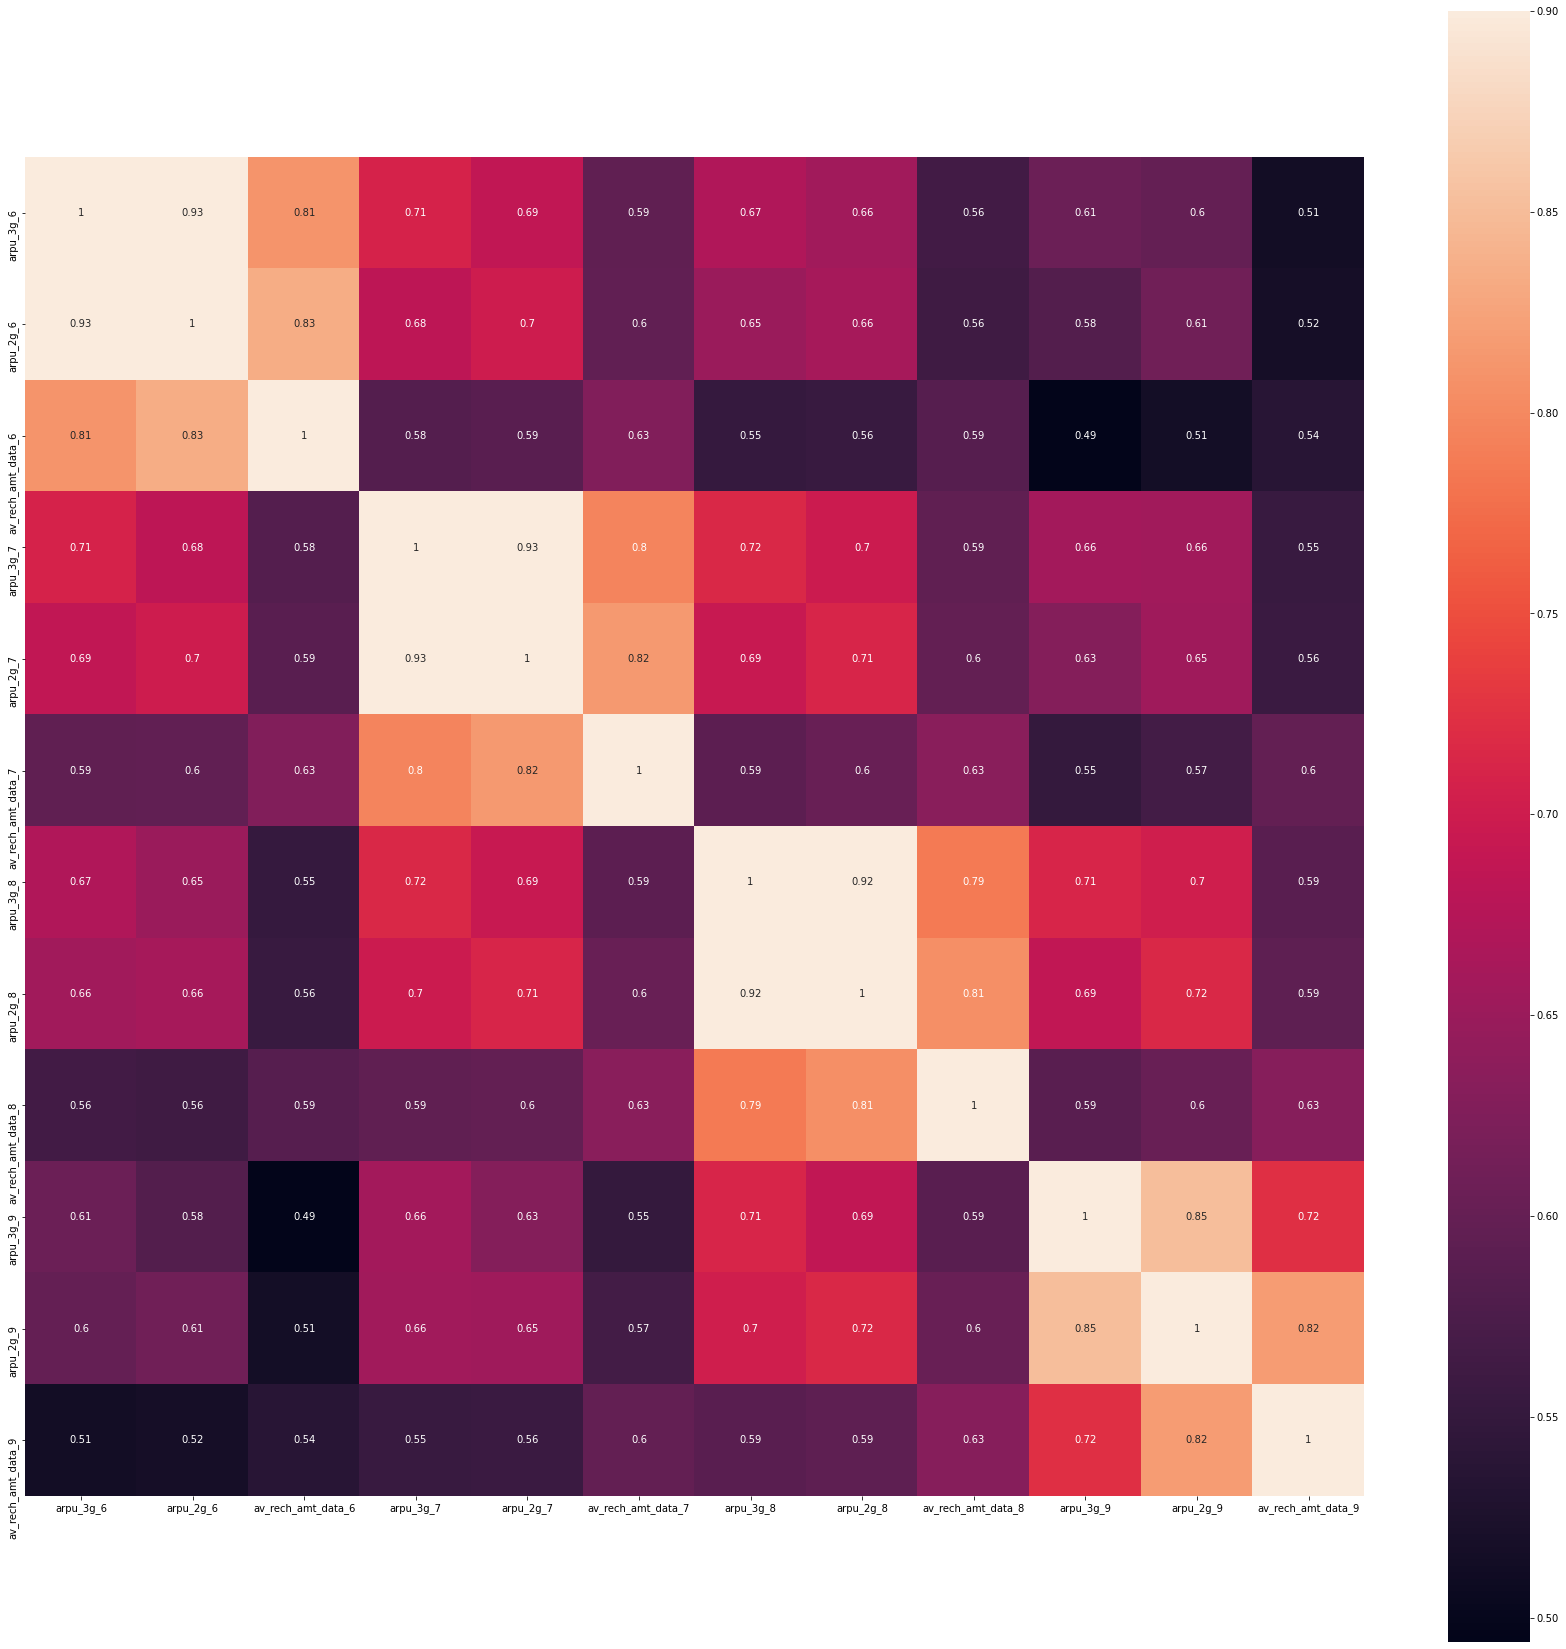

In [385]:
arpu_data =telecom_df[['arpu_3g_6',  'arpu_2g_6',   'av_rech_amt_data_6',                   
'arpu_3g_7',  'arpu_2g_7',   'av_rech_amt_data_7',                  
'arpu_3g_8',  'arpu_2g_8',    'av_rech_amt_data_8',                   
'arpu_3g_9',   'arpu_2g_9',   'av_rech_amt_data_9']]
arpu_corrMat = arpu_data.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(arpu_corrMat, vmax=0.9, square=True, annot = True) 


- These are highly correlated variables with respect to av_rech_amt_data_*.
-So we can drop off these columns


In [386]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
telecom_df.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
# shape of the dataset after removing the columns
telecom_df.shape

(99999, 194)

<b>As defined in the data dictinaory </b>
- FB_USER	Service scheme to avail services of Facebook and similar social networking sites
- night pack users : Scheme to use during specific night hours only

- So we can drop off these cloumns FB users and night pack users as there is no significance in the dataset

In [387]:
telecom_df.drop(['fb_user_6',                 
'fb_user_7',                 
'fb_user_8',                 
'fb_user_9',                 
'night_pck_user_6',          
'night_pck_user_7',          
'night_pck_user_8',          
'night_pck_user_9'], axis=1, inplace=True)
# shape of the dataset after removing the columns
telecom_df.shape


(99999, 186)

 - <b>imputation for av_rech_amt_data_*</b>

In [388]:
telecom_df[['av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','av_rech_amt_data_7','max_rech_data_7','total_rech_data_7',
             'av_rech_amt_data_8','max_rech_data_8','total_rech_data_8','av_rech_amt_data_9','max_rech_data_9','total_rech_data_9']].head(10)

,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7,av_rech_amt_data_8,max_rech_data_8,total_rech_data_8,av_rech_amt_data_9,max_rech_data_9,total_rech_data_9
0,252.0,252.0,1.0,252.0,252.0,1.0,252.0,252.0,1.0,NaN,0.0,0.0
1,NaN,0.0,0.0,154.0,154.0,1.0,50.0,25.0,2.0,NaN,0.0,0.0
2,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,46.0,46.0,1.0
3,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
4,56.0,56.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
5,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
6,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
7,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
8,NaN,0.0,0.0,177.0,154.0,2.0,69.0,23.0,3.0,NaN,0.0,0.0
9,NaN,0.0,0.0,154.0,154.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0


- From the above table we can conclude that if total_rech_data_* is zero then av_rech_amt_data_* should be zero.
- Hence we are imputing the zero value for the missing ones in av_rech_amt_data_* for the respective months 6,7,8,9

In [389]:
# conditional imputation:

for i in range(len(telecom_df)):
    if(pd.isnull((telecom_df["av_rech_amt_data_6"][i])) and (telecom_df["total_rech_data_6"][i] == 0)):       
            telecom_df["av_rech_amt_data_6"][i] = 0
           
            
    if(pd.isnull((telecom_df["av_rech_amt_data_7"][i])) and (telecom_df["total_rech_data_7"][i] == 0)):       
            telecom_df["av_rech_amt_data_7"][i] = 0
            
    if(pd.isnull((telecom_df["av_rech_amt_data_8"][i])) and (telecom_df["total_rech_data_8"][i] == 0)):       
            telecom_df["av_rech_amt_data_8"][i] = 0
            
    if(pd.isnull((telecom_df["av_rech_amt_data_9"][i])) and (telecom_df["total_rech_data_9"][i] == 0)):       
            telecom_df["av_rech_amt_data_9"][i] = 0

##### again check the null value percentage

In [390]:

round(100*telecom_df.isnull().sum()[(telecom_df.isnull().sum()>0)]/len(telecom_df), 2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
loc_ic_t2t_mou_9             7.75
                            ...  
loc_ic_mou_7                 3.86
spl_og_mou_7                 3.86
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
Length: 116, dtype: float64

- From the above imputation missing values , we can conclude that date_of_last_rech_data_* has no significance after imputing 
- the missing values to the columns total_rech_data_*, max_rech_data_*a and those date columns higher percentage of missing values 
- Hence we can drop off those

In [391]:
telecom_df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
#checking the shape of the data
telecom_df.shape

(99999, 182)

- <b>we can also drop the columns as we are not using those any more</b>

In [392]:
telecom_df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
#checking the shape of the data
telecom_df.shape

(99999, 178)

# Data Preparation

### Deriving new features 

- Caluculating total Recharge amount for Data be 
  - total_rech_amt_data_6  = av_rech_amt_data_6 * total_rech_data_6
- calculating total recharge amount be like
  - Overall_rech_amnt_6 = total_rech_amt_data_6 + total_rech_amt_6
 - we can do these calculations for the respective months

In [393]:
# Calculating the total recharge amount done for data alone in months 6,7
telecom_df['total_rech_amt_data_6']=telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_rech_amt_data_7']=telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7
telecom_df['overall_rech_amt_6'] = telecom_df['total_rech_amt_data_6'] + telecom_df['total_rech_amt_6']
telecom_df['overall_rech_amt_7'] = telecom_df['total_rech_amt_data_7'] + telecom_df['total_rech_amt_7']


 - <b>as we have derived new columns from these columns we can drop those variables</b>

In [394]:
telecom_df.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)
telecom_df.shape

(99999, 174)

## Filter high-value customers

In [395]:
# Calculating the average recharge done by customer in months June and July(6th and 7th month)
telecom_df['avg_rech_amt_6_7'] = (telecom_df['overall_rech_amt_6'] + telecom_df['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")



The 70th quantile value to determine the High Value Customer is:  478.0 



In [396]:
# Filtering the data to be considered as High Value Customer
telecom_df = telecom_df[telecom_df['avg_rech_amt_6_7'] > cut_off]
telecom_df.shape

(29953, 175)

## ii) imputing median

In [397]:
missing_cols = telecom_df.columns[telecom_df.isnull().sum()>0]
for col in missing_cols:
    telecom_df[col].fillna((telecom_df[col].median()), inplace=True)

In [398]:
# again check the null value percentage
round(100*telecom_df.isnull().sum()[(telecom_df.isnull().sum()>0)]/len(telecom_df), 2).sort_values(ascending=False)

Series([], dtype: float64)

- No more null values found

In [399]:
telecom_df.shape

(29953, 175)

## Tag churners and remove attributes of the churn phase

- <b><font color = 'blue'>Defining Target variable</b> </font>
  - For creating churn variable, we using the below variables
     - total_ic_mou_9
     - total_og_mou_9
     - vol_2g_mb_9  
     - vol_3g_mb_9 


In [400]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
print("-------------------info---------------------")
print(telecom_df[churn_col].info())
print("-------------------head---------------------")
telecom_df[churn_col].head(10)

-------------------info---------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  29953 non-null  float64
 1   total_og_mou_9  29953 non-null  float64
 2   vol_2g_mb_9     29953 non-null  float64
 3   vol_3g_mb_9     29953 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB
None
-------------------head---------------------


,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74
33,114.16,1.70,30.92,5588.11
38,114.09,708.04,0.00,0.00
41,165.84,89.13,0.00,0.00
48,894.81,2319.01,0.00,0.00
53,680.61,503.06,0.82,0.00


In [401]:
# Initializing the churn variable.
telecom_df['churn']=0

# Imputing the churn values based on the condition
telecom_df['churn'] = np.where(telecom_df[churn_col].sum(axis=1) == 0, 1, 0)

# Checking the top 10 data
telecom_df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,21.100,88.14,86.89,0.00,65.43,229.63,...,0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,65.43,453.43,...,0,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,315,21.03,910.65,122.16,0.00,437.0,955.0,696.0,0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,0,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0,0
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,0,604,40.45,51.86,0.00,0.00,0.0,1166.0,583.0,0
33,7000149764,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,...,0,1328,358.10,2706.83,1714.67,0.00,6343.0,23230.0,14786.5,0
38,7000815202,363.987,486.558,393.909,391.709,248.99,619.96,666.38,494.79,88.86,...,0,1155,0.00,0.00,0.00,0.00,420.0,636.0,528.0,0
41,7000721289,482.832,425.764,229.769,143.596,86.39,118.88,80.44,40.06,232.36,...,0,2010,0.00,0.00,0.00,0.00,496.0,510.0,503.0,0
48,7000294396,1873.271,575.927,179.218,1189.744,2061.69,881.43,156.91,1589.23,1087.76,...,0,1265,0.00,0.00,0.00,0.00,2317.0,580.0,1448.5,0
53,7002188521,978.077,1141.296,706.020,1076.247,135.14,119.59,102.69,99.83,479.31,...,0,697,0.00,0.00,0.00,0.00,1503.0,1947.0,1725.0,0


### churn percentage of the given data

0    91.877274
1     8.122726
Name: churn, dtype: float64


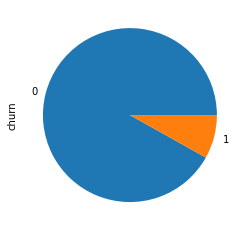

In [402]:
print((telecom_df['churn'].value_counts()/len(telecom_df))*100)
((telecom_df['churn'].value_counts()/len(telecom_df))*100).plot(kind="pie")
plt.show()

### - As shown in the pie graph , 91% of the customers not churn , there is a possibility of class imbalance



- <b>removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names can be dropped from the dataset).</b>

In [403]:
# Selecting all the churn phase columns to drop 
churn_phase_cols = [col for col in telecom_df.columns if '_9' in col]
print("The churn phase columns are:\n",churn_phase_cols)

The churn phase columns are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [404]:
# Dropping the selected churn phase columns haing _9 in the name
telecom_df.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_df.shape

(29953, 133)

- We can also derive features from the good phase variables and drop the seperate 6th and 7 month variables.


- Before proceding to check the remaining missing value handling, 
let us check the collineartity of the indepedent variables and try to understand their dependencies.

### correlation among the independent variables

In [405]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_df_corr = telecom_df.corr()
telecom_df_corr

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
mobile_number,1.000000,0.033830,0.029606,0.034434,0.009708,0.005351,0.007313,0.020850,0.011423,0.017347,...,-0.009653,0.315511,-0.031976,-0.027987,-0.037743,-0.007536,-0.004703,-0.004994,-0.005710,-0.029966
arpu_6,0.033830,1.000000,0.671846,0.612987,0.340517,0.216175,0.187744,0.505907,0.340690,0.289408,...,-0.017510,0.041525,0.058542,0.055092,0.112315,0.045044,0.419394,0.210553,0.368187,0.067672
arpu_7,0.029606,0.671846,1.000000,0.759924,0.211366,0.318863,0.267964,0.351774,0.486528,0.391482,...,0.000918,0.031532,0.083708,0.102387,0.055114,0.059208,0.230702,0.419667,0.385039,-0.012397
arpu_8,0.034434,0.612987,0.759924,1.000000,0.151163,0.232183,0.343254,0.278273,0.373859,0.515090,...,0.045400,0.070668,0.146493,0.085258,0.073729,0.104864,0.215326,0.295953,0.301868,-0.160612
onnet_mou_6,0.009708,0.340517,0.211366,0.151163,1.000000,0.751120,0.621781,0.085273,0.035566,0.035273,...,-0.045233,-0.047055,-0.105295,-0.111555,-0.101830,-0.033681,0.029308,-0.020960,0.004302,0.072325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sep_vbc_3g,-0.007536,0.045044,0.059208,0.104864,-0.033681,-0.033127,-0.027234,-0.019209,-0.020288,-0.009899,...,0.052365,0.012045,0.193456,0.149055,0.138166,1.000000,0.073269,0.088424,0.095341,-0.043763
overall_rech_amt_6,-0.004703,0.419394,0.230702,0.215326,0.029308,-0.016173,-0.012498,0.077889,0.015693,0.018106,...,0.249995,-0.037459,0.166801,0.193566,0.277803,0.073269,1.000000,0.443456,0.842715,0.014825
overall_rech_amt_7,-0.004994,0.210553,0.419667,0.295953,-0.020960,0.020059,0.025509,0.003077,0.059168,0.048001,...,0.324016,-0.038635,0.231171,0.291085,0.198912,0.088424,0.443456,1.000000,0.856237,-0.040611
avg_rech_amt_6_7,-0.005710,0.368187,0.385039,0.301868,0.004302,0.002727,0.008118,0.046740,0.044584,0.039267,...,0.338706,-0.044796,0.234989,0.286402,0.279589,0.095341,0.842715,0.856237,1.000000,-0.015849


- <b>checking the correlation</b>

In [406]:
telecom_df_corr.loc[:,:] = np.tril(telecom_df_corr, k=-1)
telecom_df_corr = telecom_df_corr.stack()
telecom_df_corr
# getting the higly correlated variables
telecom_df_corr[(telecom_df_corr > 0.80) | (telecom_df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955322
isd_og_mou_8        isd_og_mou_7          0.943120
                    isd_og_mou_6          0.918187
isd_og_mou_7        isd_og_mou_6          0.915247
sachet_2g_8         total_rech_data_8     0.900628
total_ic_mou_6      loc_ic_mou_6          0.893820
total_ic_mou_8      loc_ic_mou_8          0.890632
total_ic_mou_7      loc_ic_mou_7          0.881714
std_og_t2t_mou_8    onnet_mou_8           0.860648
std_og_t2t_mou_7    onnet_mou_7           0.860278
std_og_t2t_mou_6    onnet_mou_6           0.859311
avg_rech_amt_6_7    overall_rech_amt_7    0.856237
std_og_t2m_mou_7    offnet_mou_7          0.854818
std_og_t2m_mou_8    offnet_mou_8          0.851581
total_og_mou_8      std_og_mou_8          0.850403
total_og_mou_7      std_og_mou_7          0.849087
loc_ic_mou_8        loc_ic_t2m_mou_8      0.846301
std_ic_mou_8        std_ic_t2m_mou_8      0.845637
loc_ic_mou_6        loc_ic_t2m_mou_6      0.843865
avg_rech_amt_6_7    overall_rec

- <b>Drop the columns which are highly correlated whihch is of 85%</b>

In [407]:
cols_high_corr=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8'] #total_og_mou_8

#  dropping these column
telecom_df.drop(cols_high_corr, axis=1, inplace=True)
#checking the data shape
telecom_df.shape

(29953, 121)

- <b> We have a column called 'aon' = Age on network - number of days the customer is using the operator T network

-  we can derive new variables from this to explain the data w.r.t churn.</b>

In [408]:
# creating a new variable 'tenure'
telecom_df['tenure'] = (telecom_df['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_df.drop('aon',axis=1, inplace=True)

In [409]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_df['tenure_range'] = pd.cut(telecom_df['tenure'], tn_range, labels=tn_label)
telecom_df['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

- <b>The average revenue per user is good phase of customer is given by arpu_6 and arpu_7.
- since we have two seperate averages, lets take an average to these two and drop the other columns.</b>

In [410]:
telecom_df["avg_arpu_6_7"]= (telecom_df['arpu_6']+telecom_df['arpu_7'])/2
telecom_df['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [411]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data
telecom_df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)
# The curent dimension of the dataset after dropping few unwanted columns
telecom_df.shape

(29953, 121)

# Data visualization

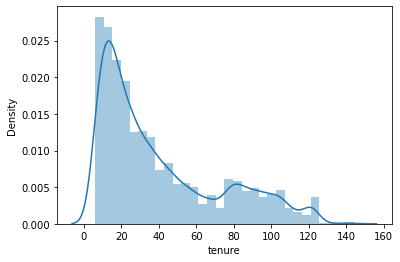

In [412]:
# Checking the distribution of he tenure variable
sns.distplot(telecom_df['tenure'],bins=30)
plt.show()

### Univariate Anlysis


Execution Time for Univariate analysis =  4.53 seconds



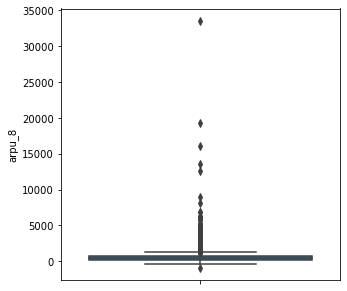

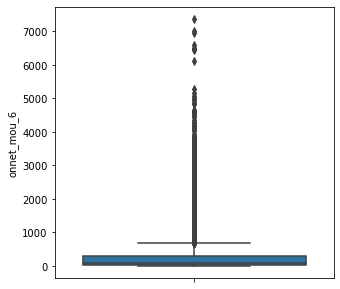

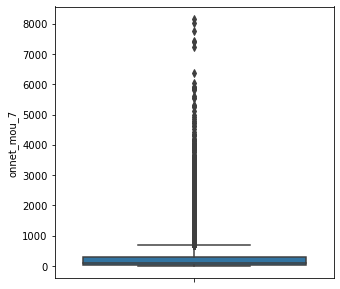

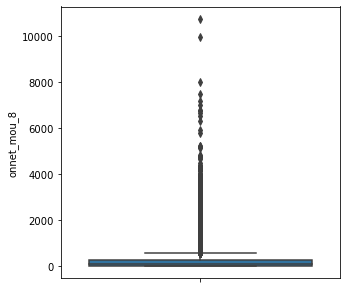

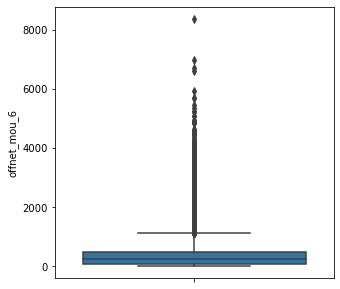

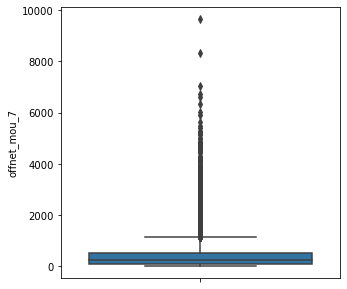

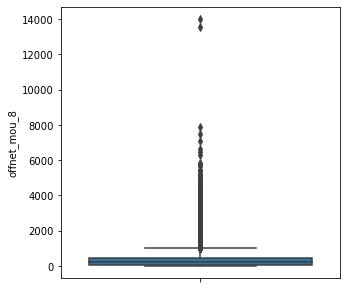

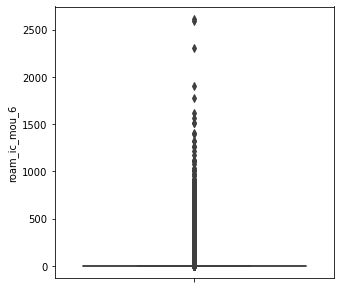

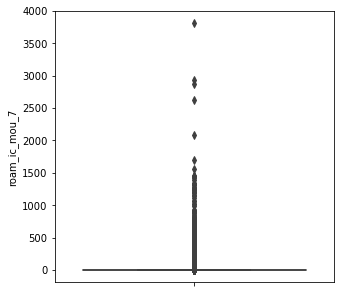

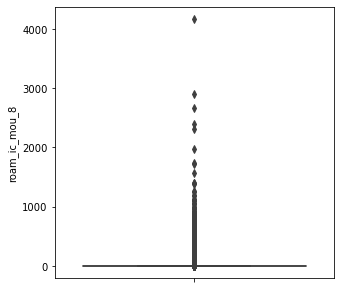

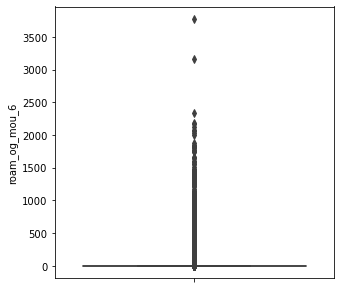

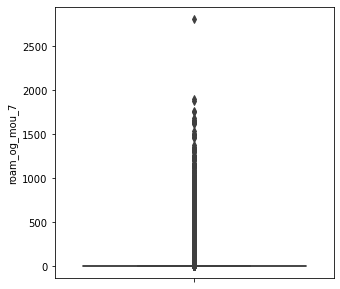

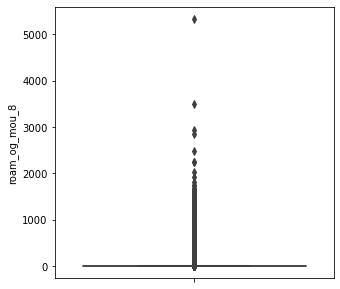

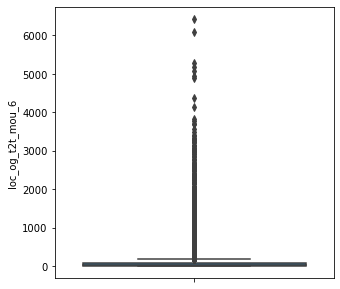

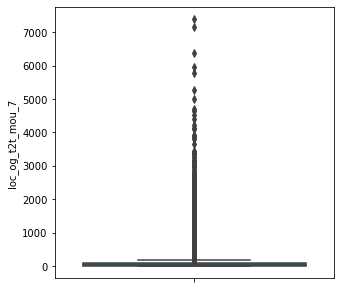

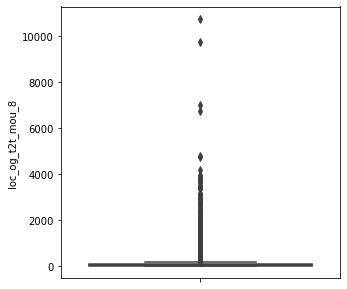

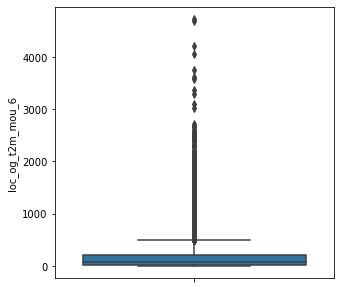

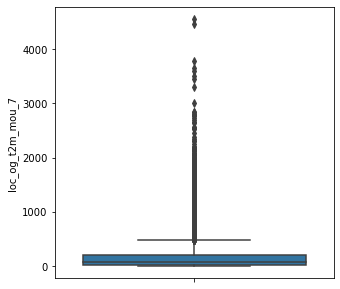

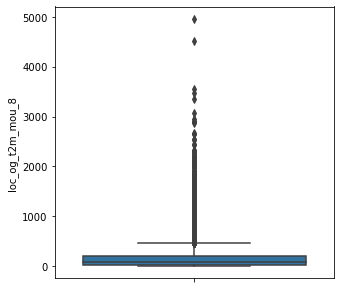

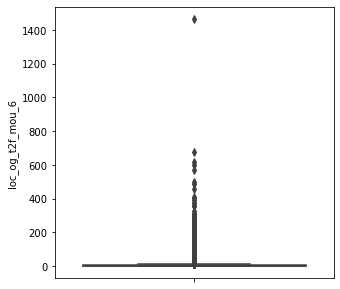

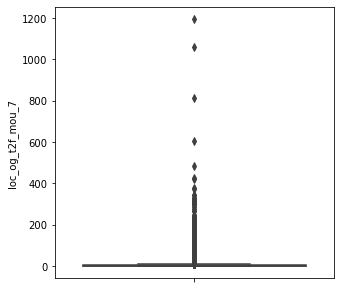

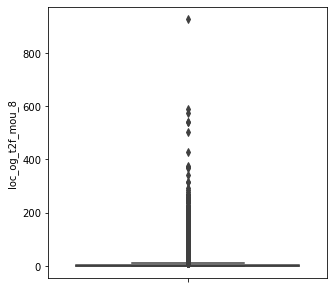

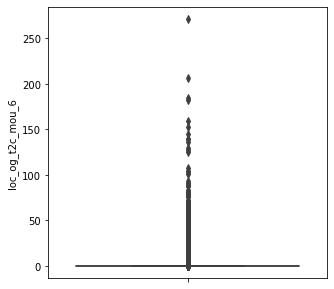

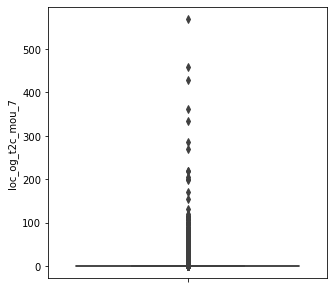

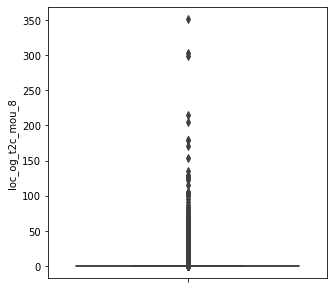

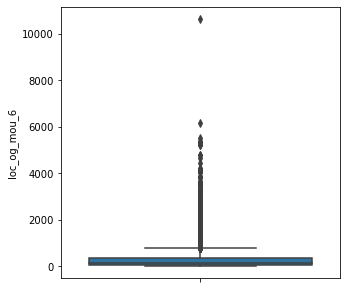

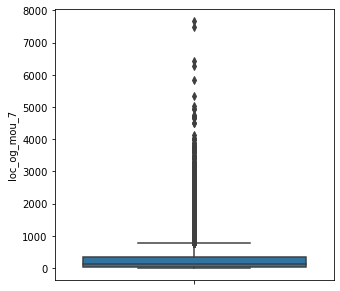

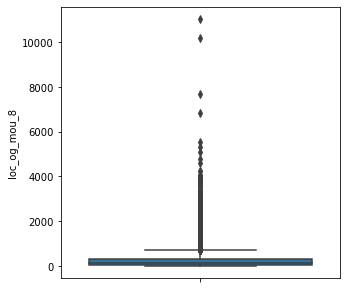

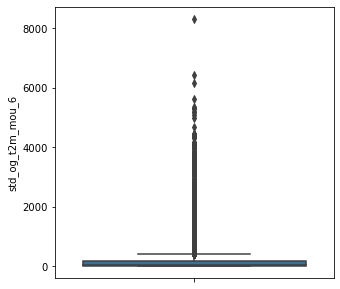

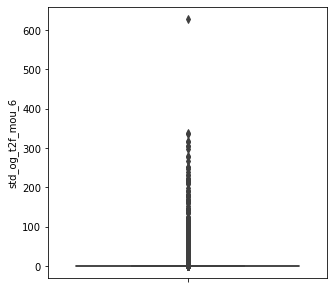

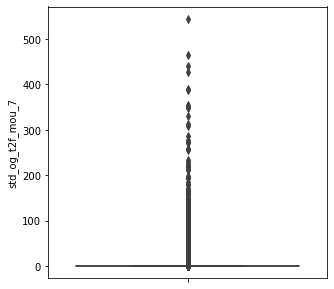

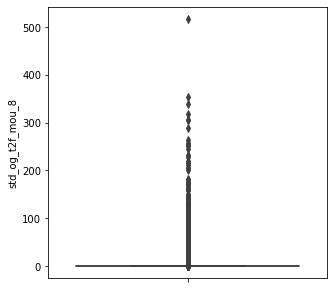

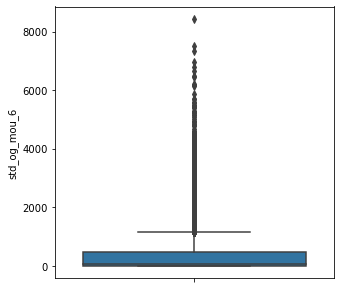

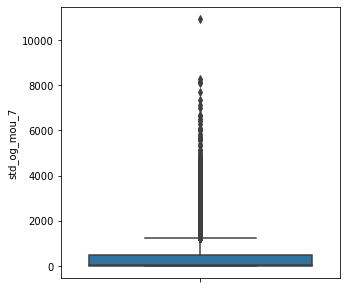

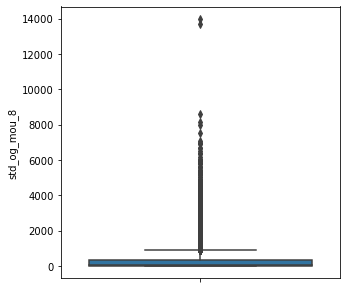

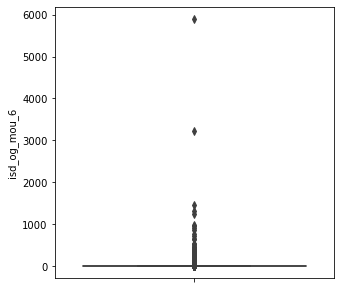

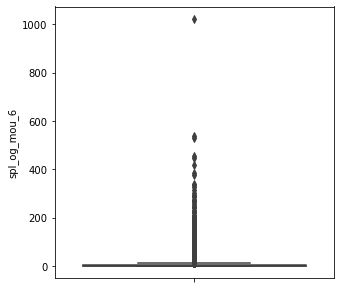

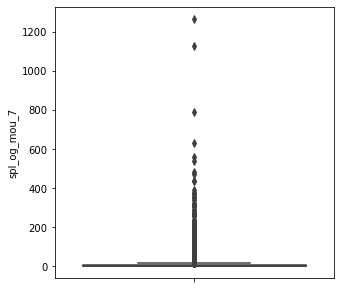

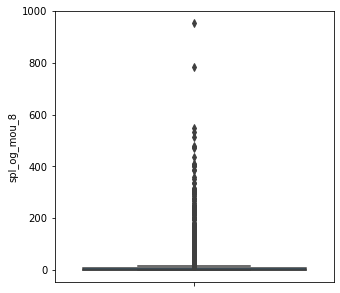

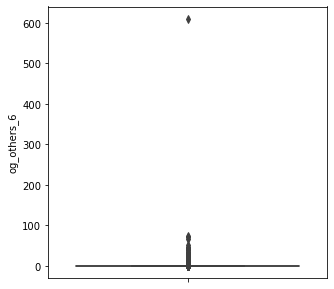

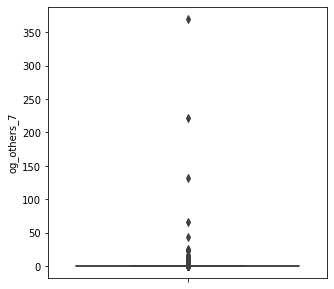

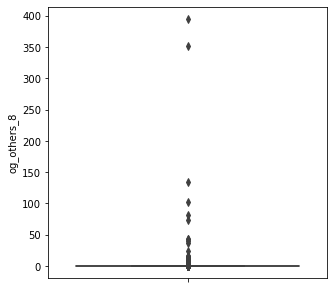

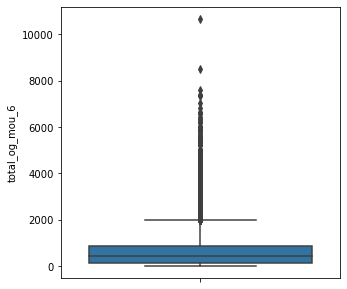

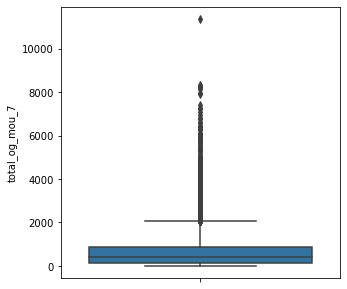

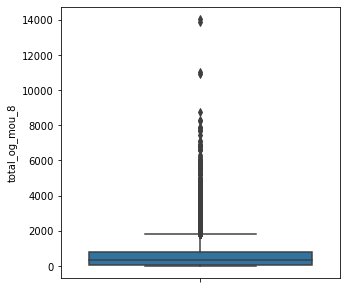

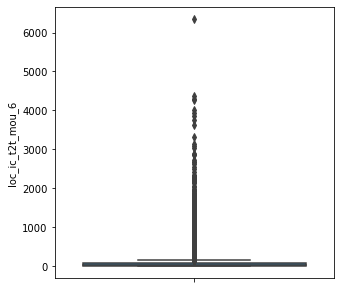

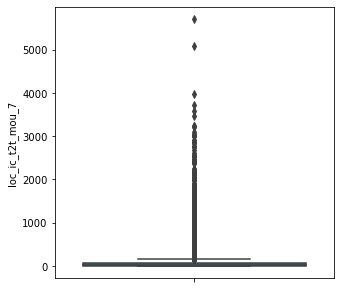

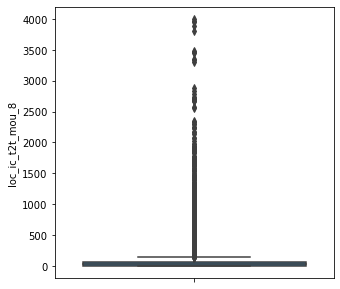

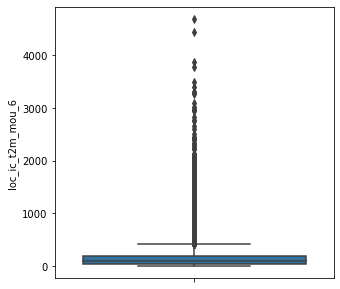

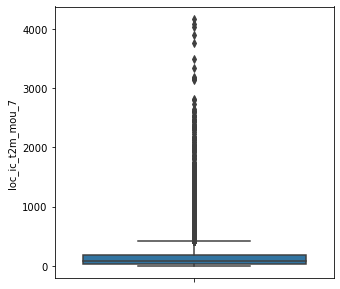

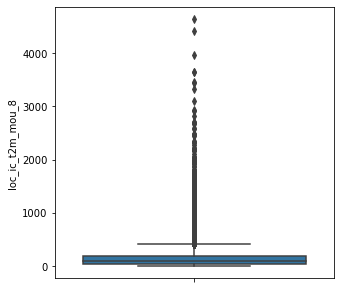

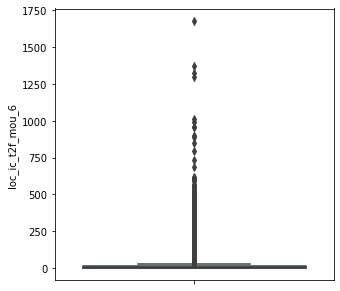

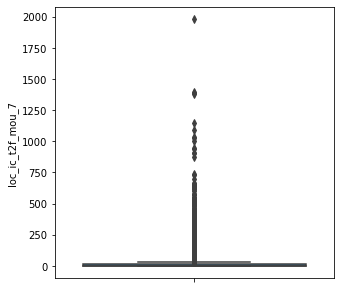

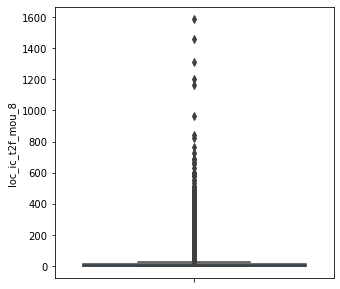

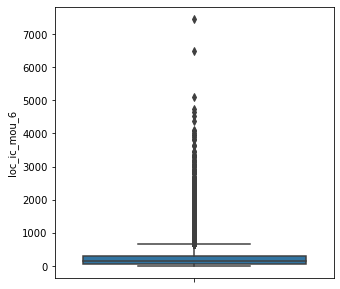

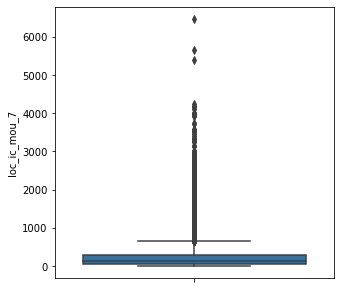

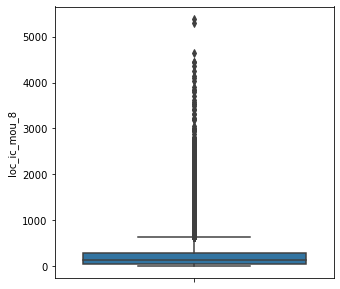

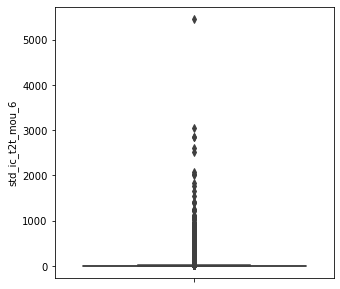

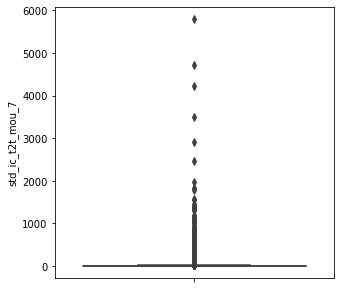

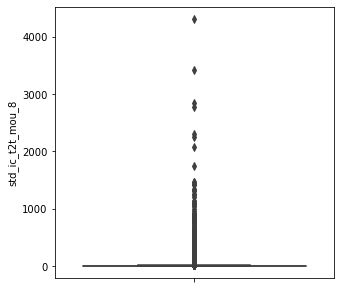

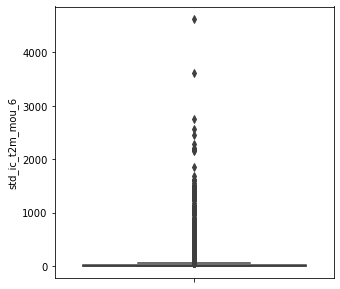

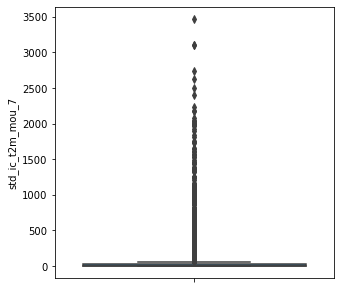

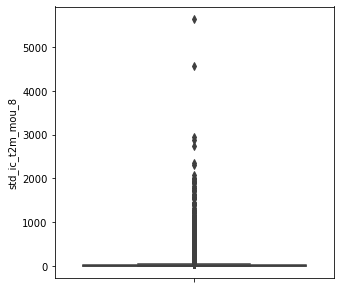

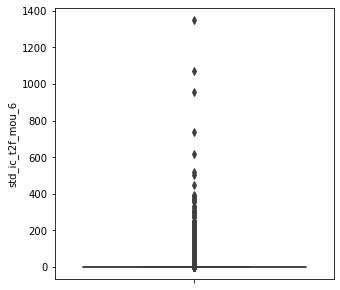

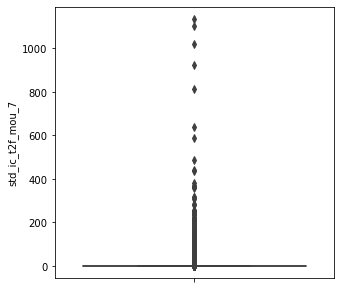

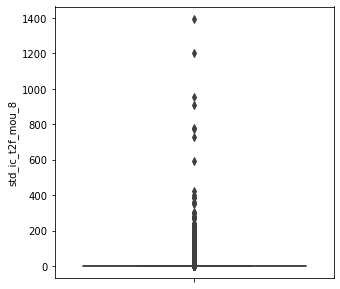

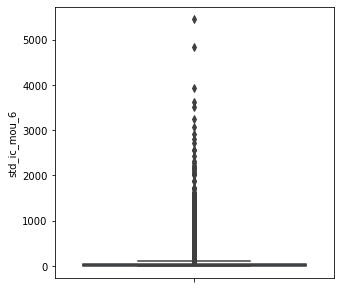

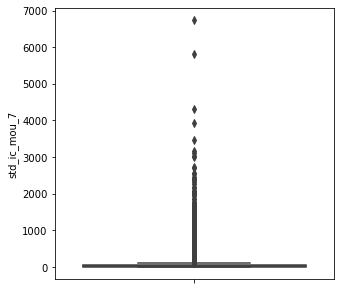

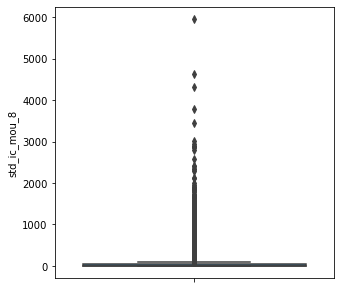

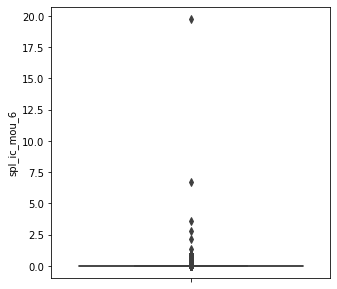

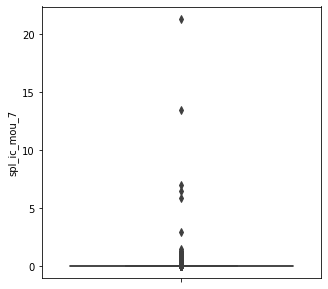

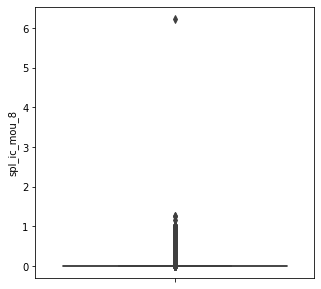

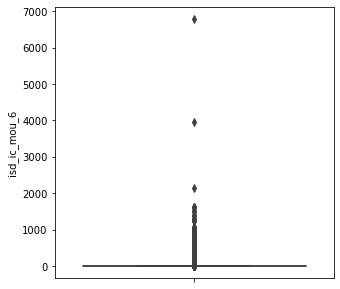

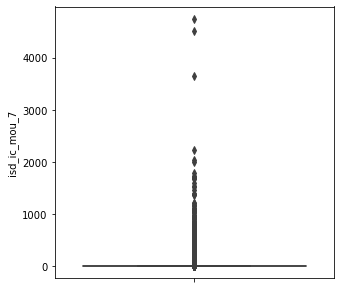

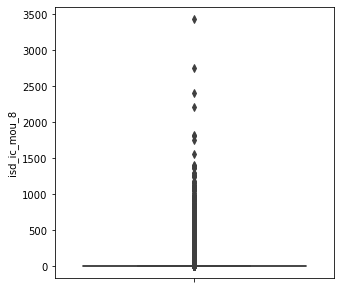

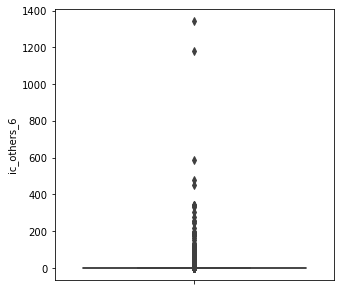

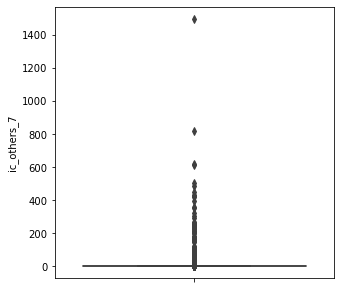

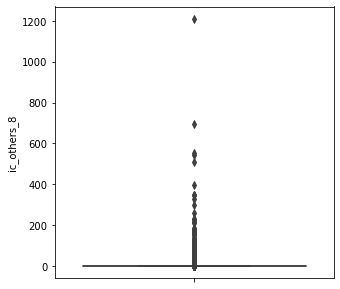

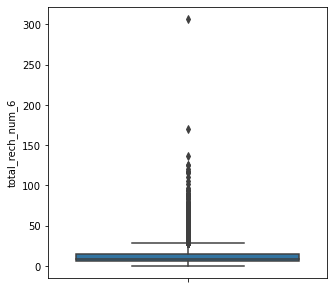

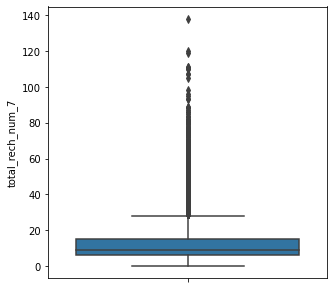

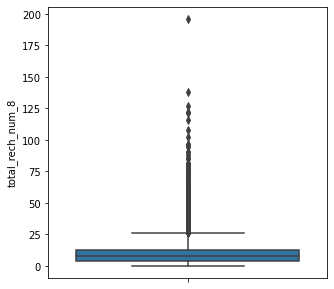

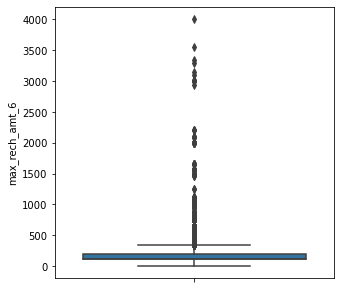

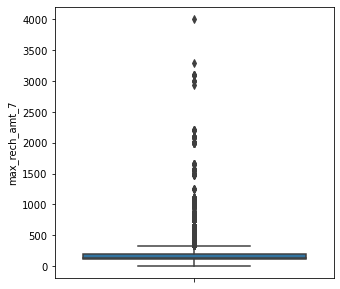

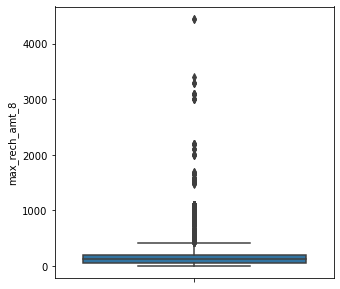

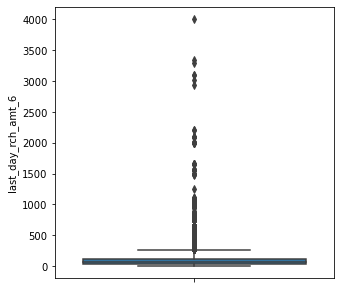

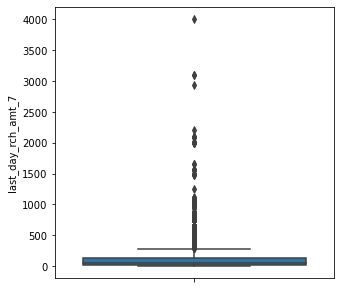

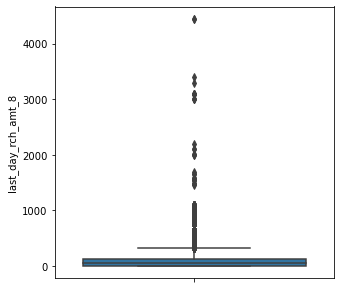

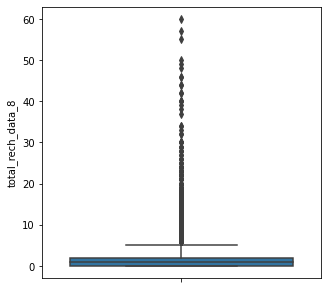

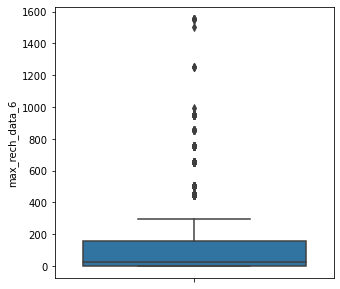

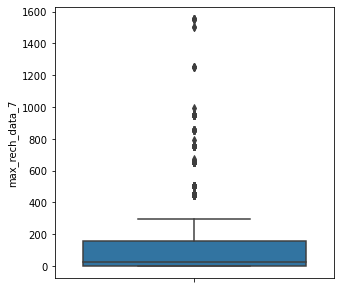

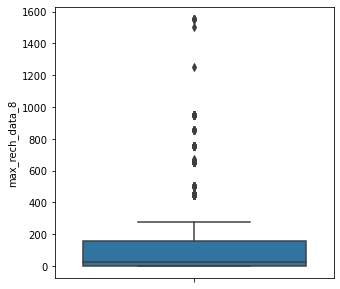

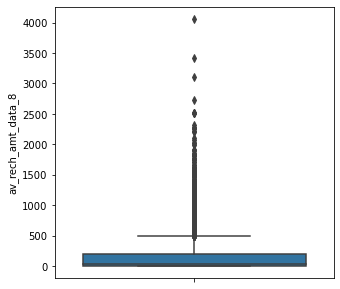

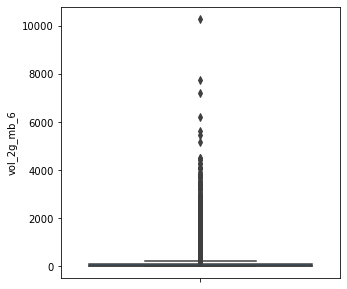

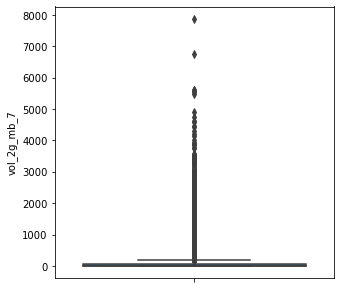

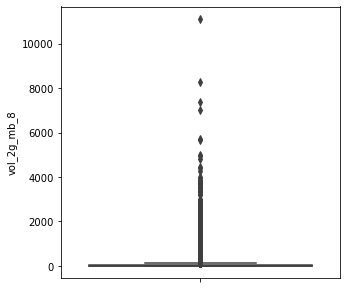

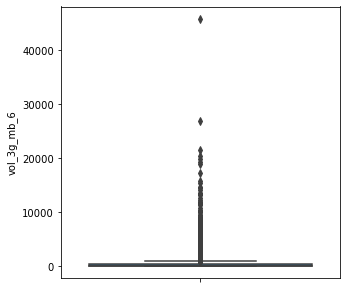

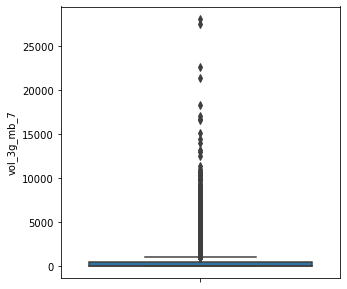

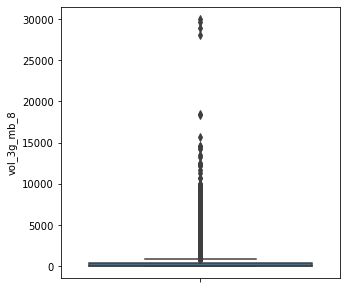

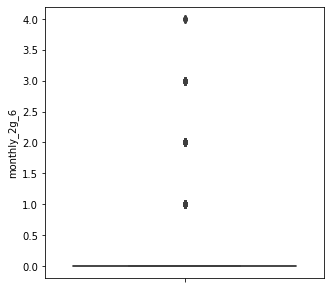

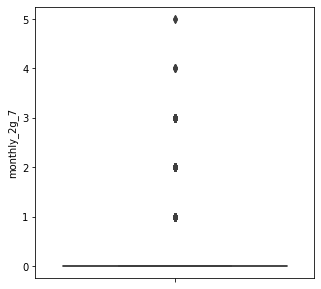

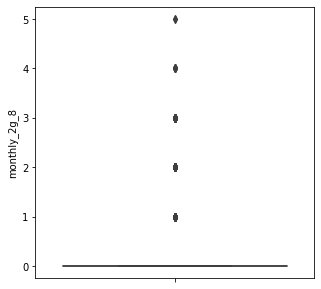

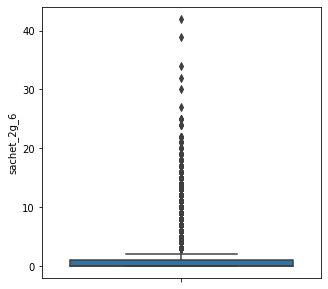

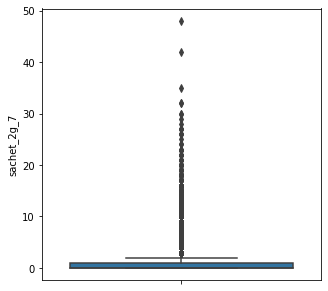

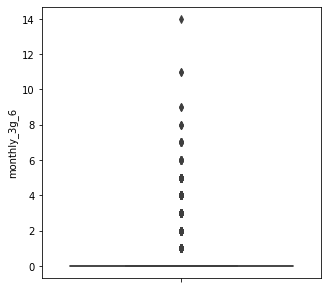

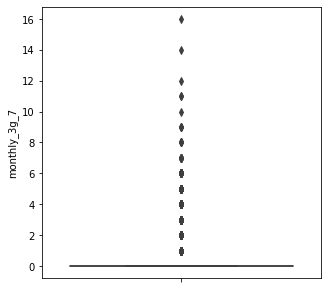

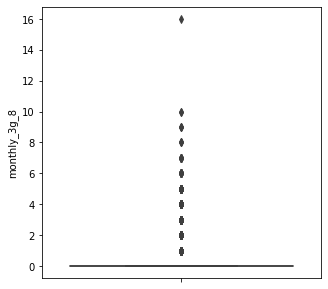

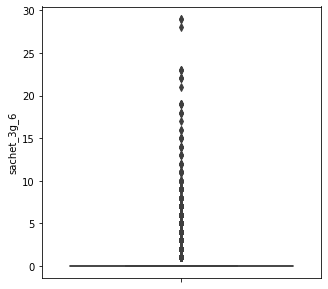

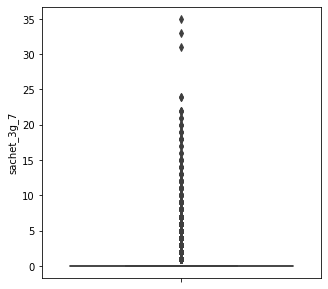

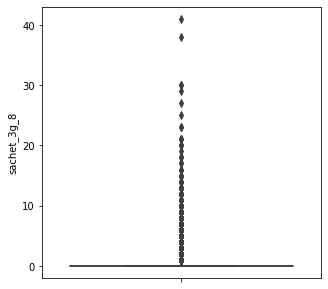

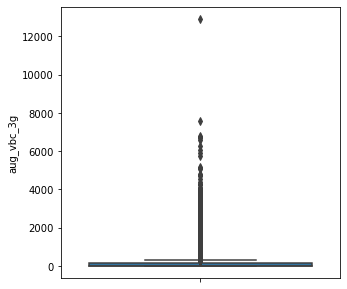

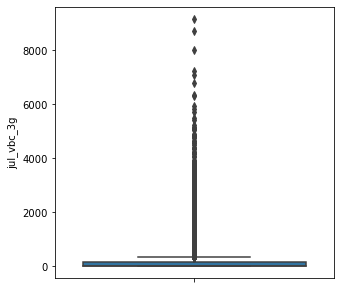

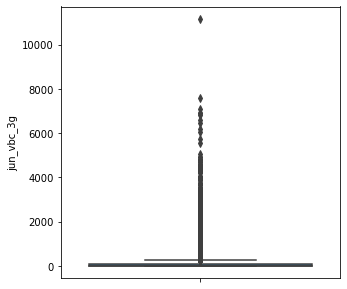

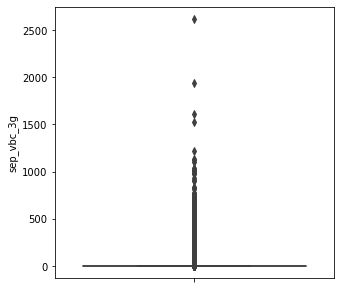

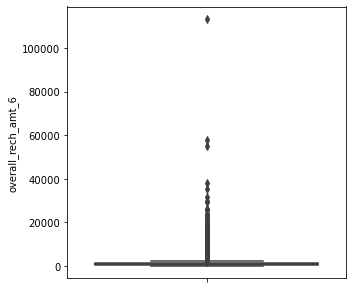

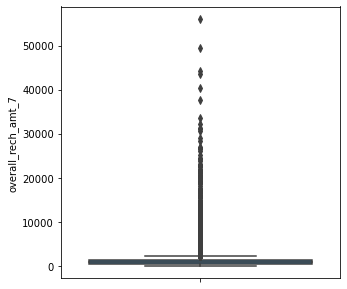

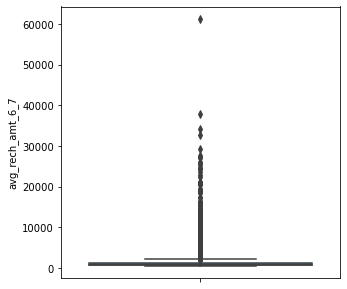

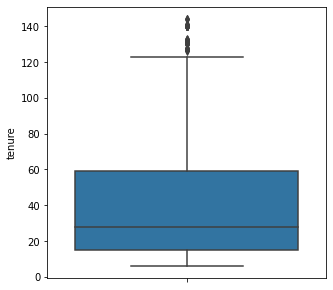

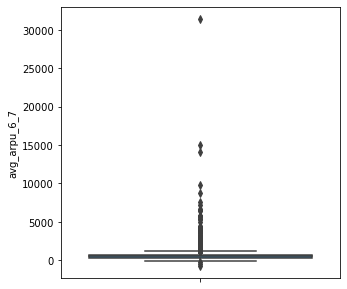

In [413]:
start_time=time.time()
cont_cols = [col for col in telecom_df.columns if col not in ['churn','mobile_number', 'tenure_range']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_df)
end_time=time.time()
print("\nExecution Time for Univariate analysis = ", round(end_time-start_time,2),"seconds\n")

## Bivariate Analysis

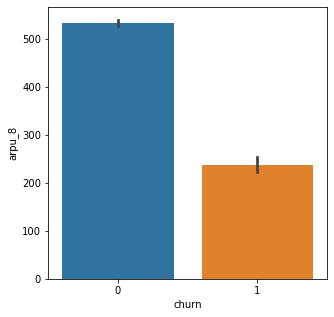

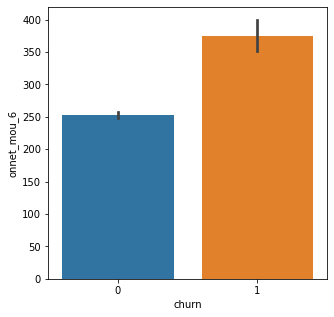

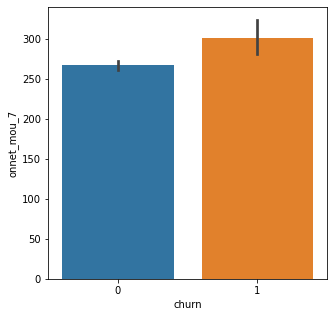

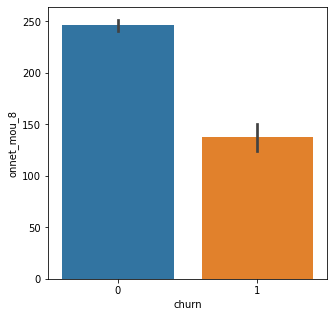

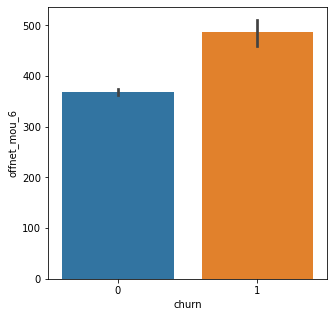

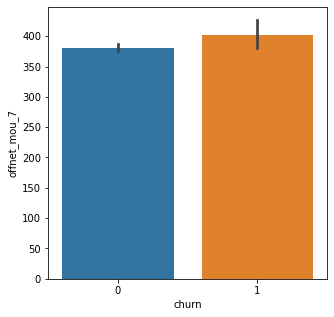

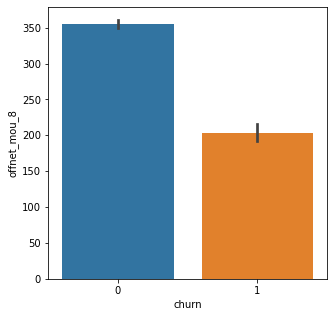

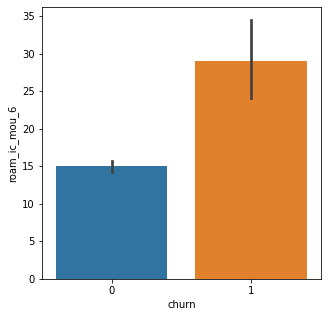

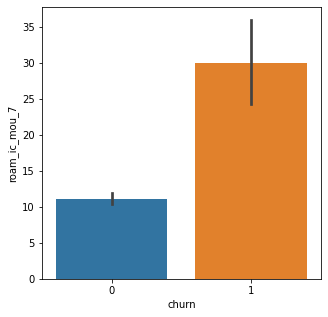

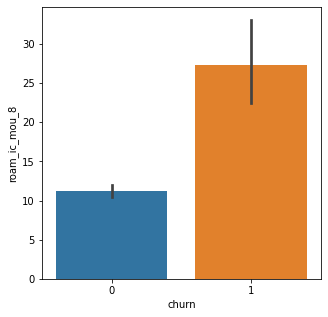

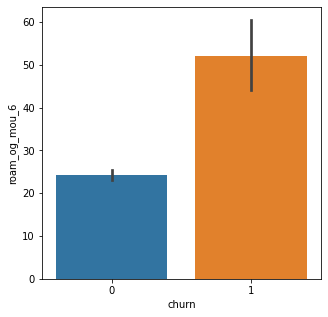

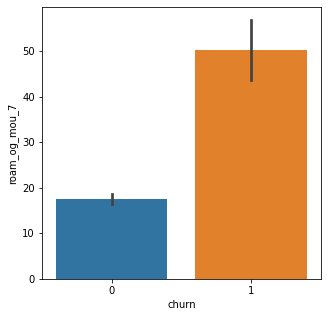

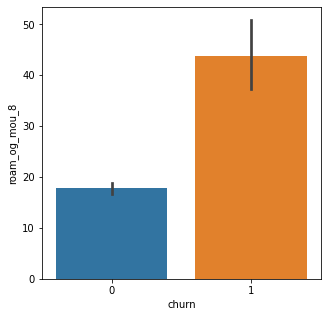

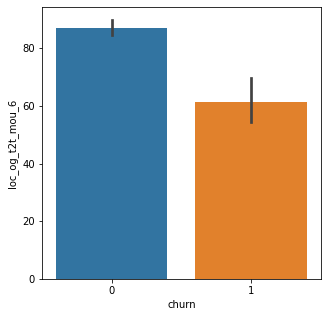

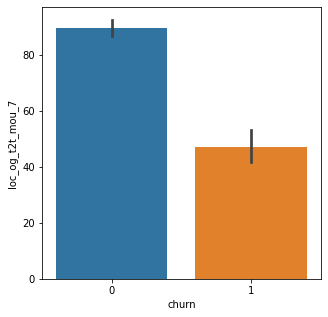

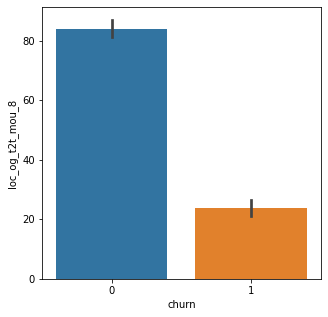

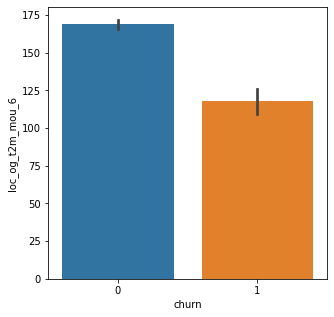

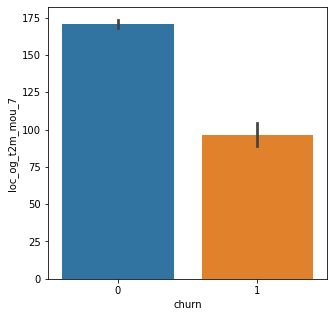

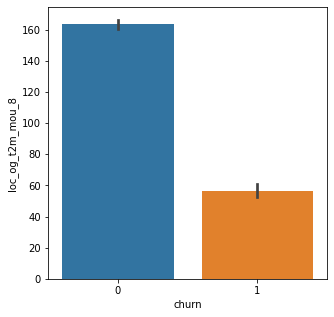

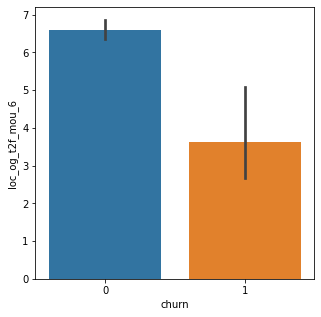

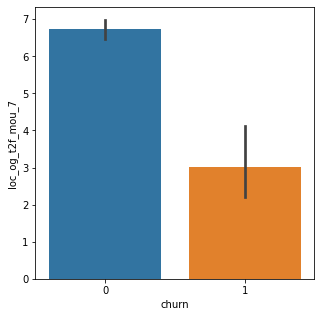

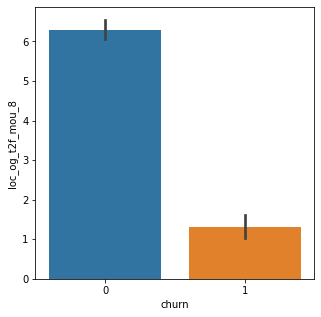

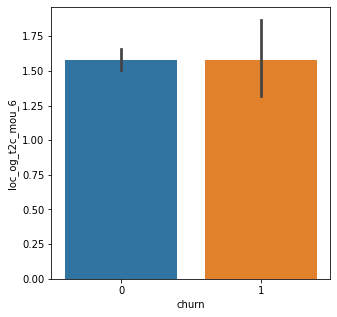

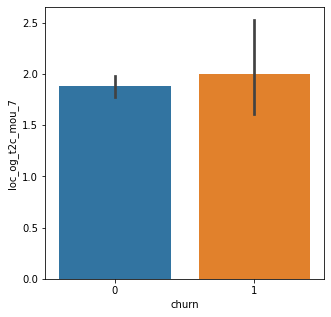

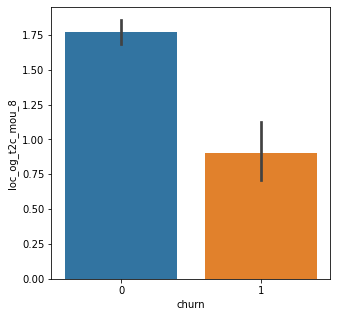

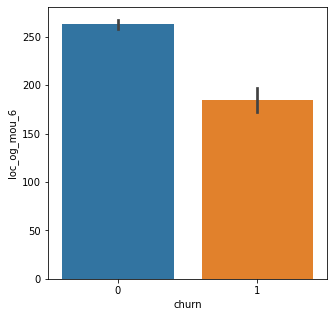

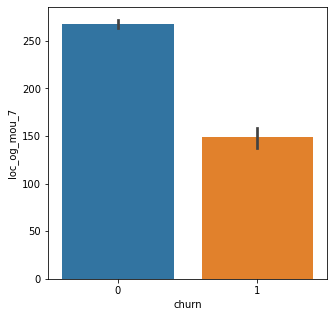

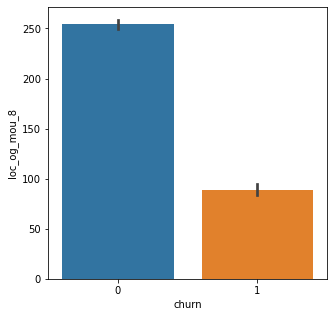

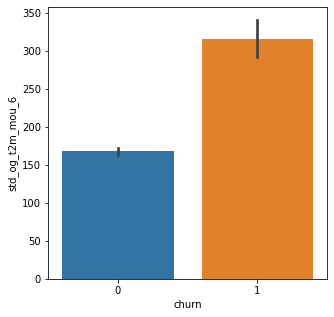

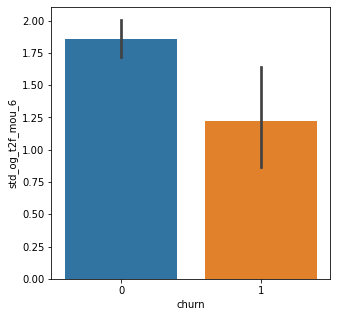

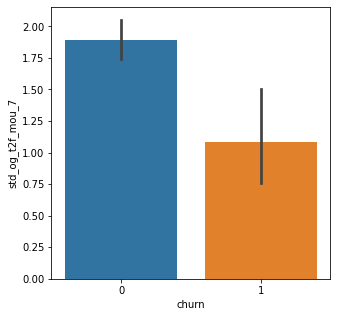

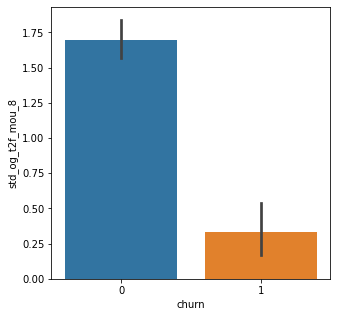

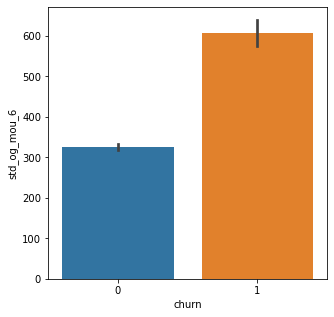

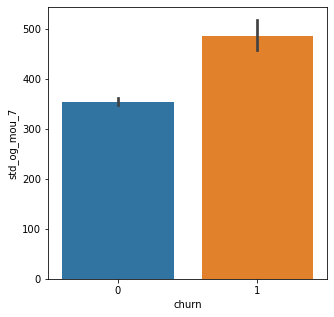

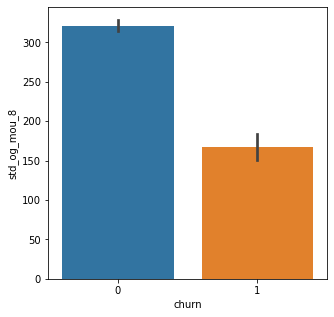

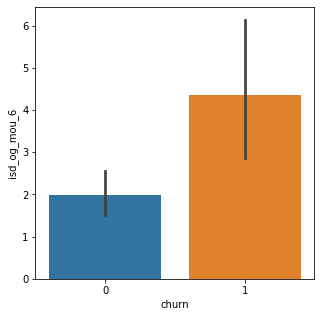

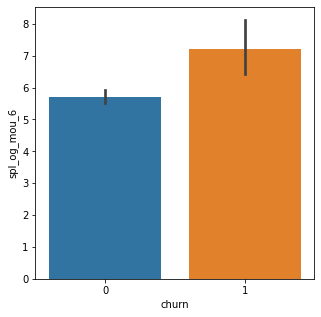

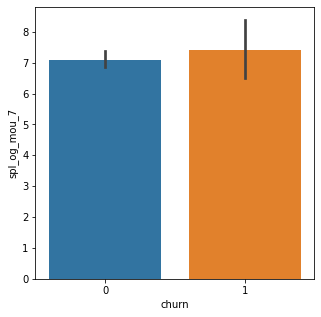

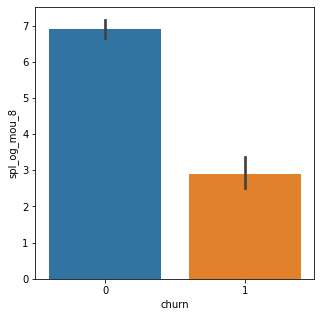

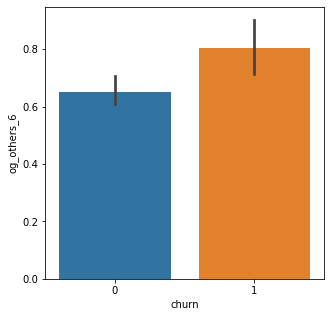

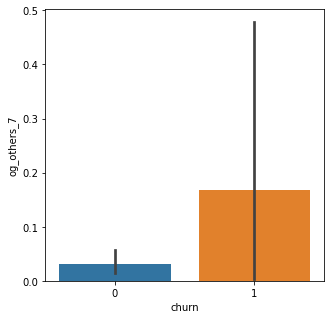

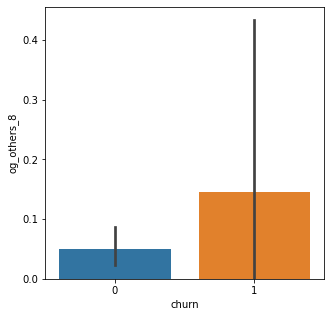

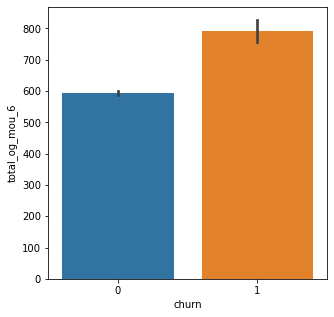

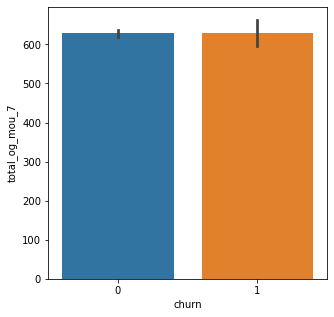

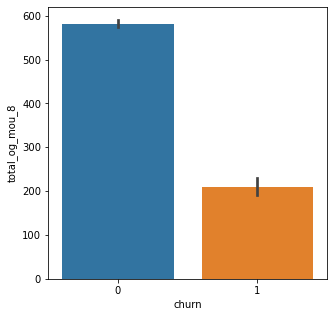

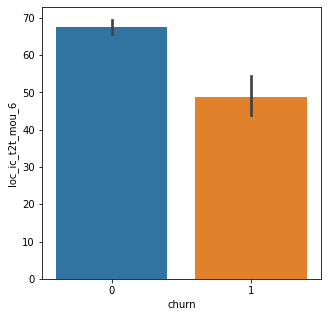

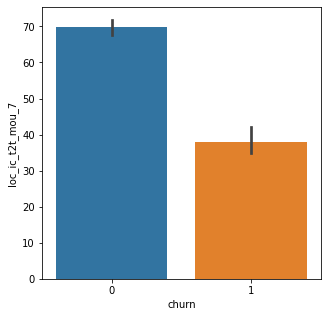

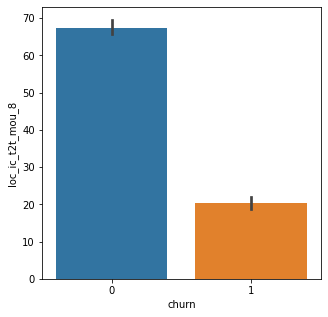

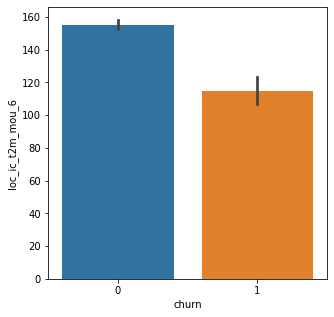

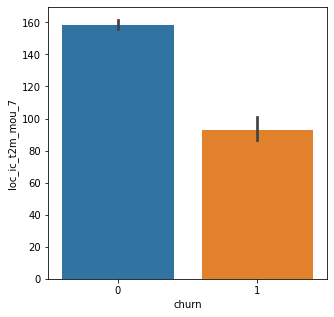

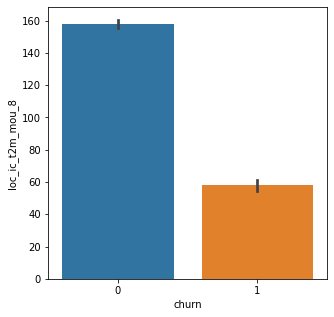

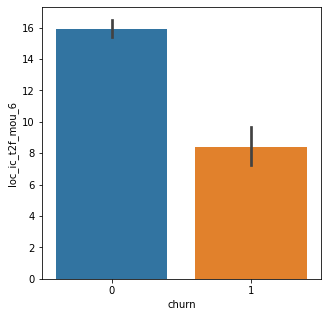

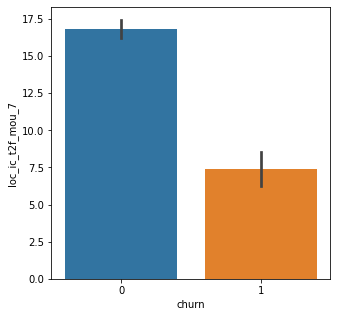

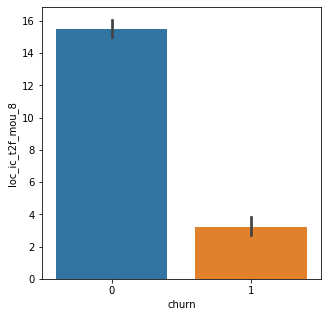

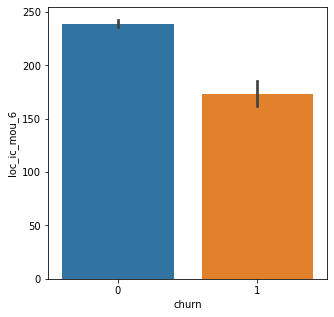

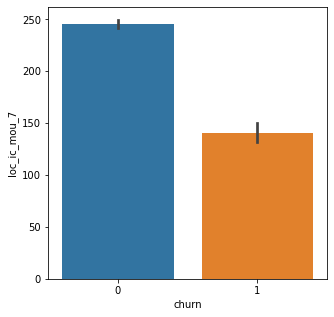

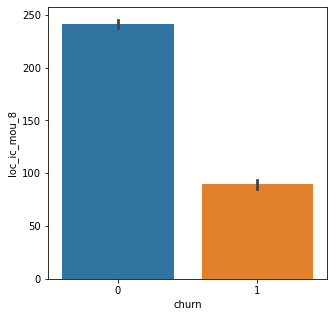

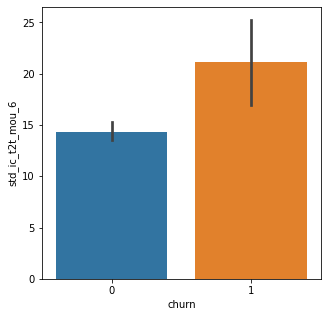

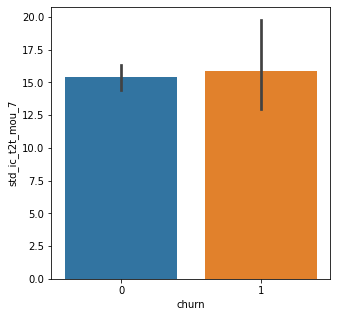

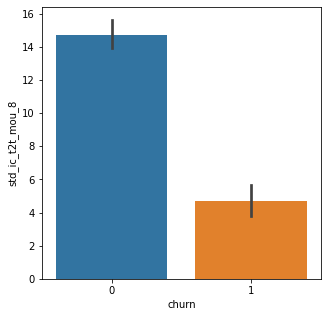

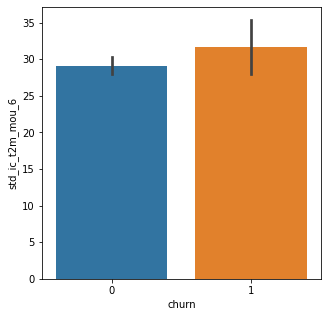

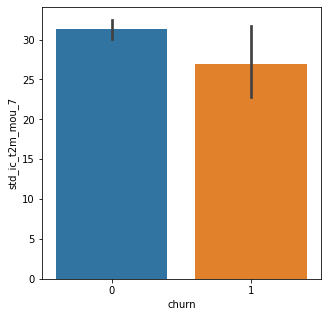

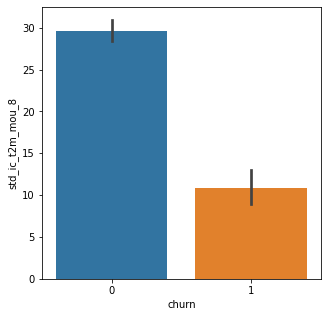

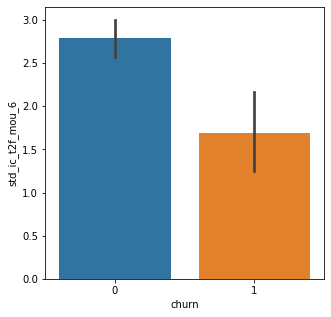

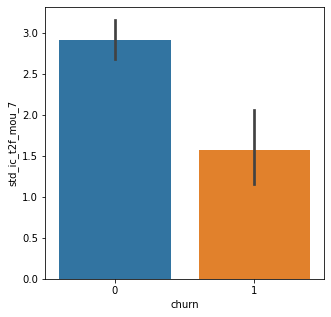

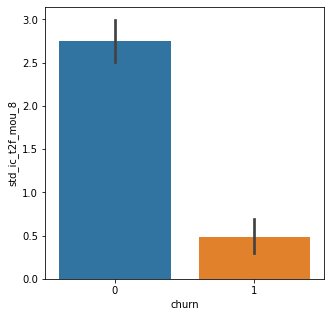

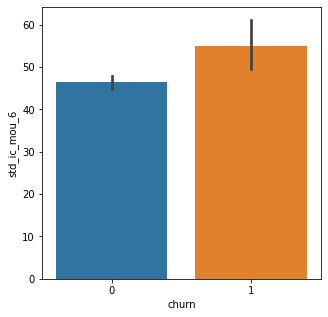

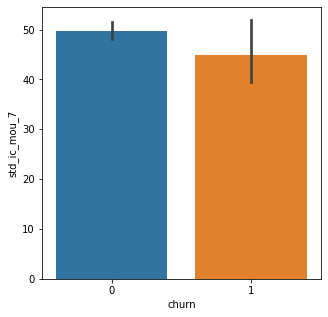

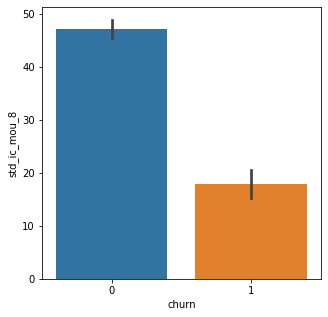

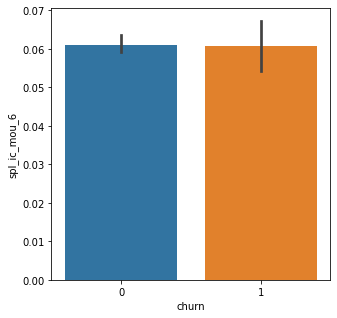

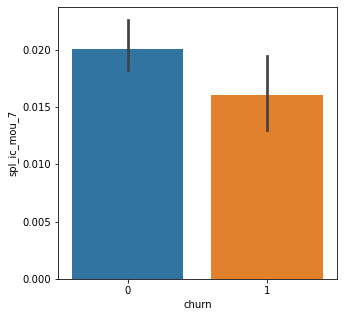

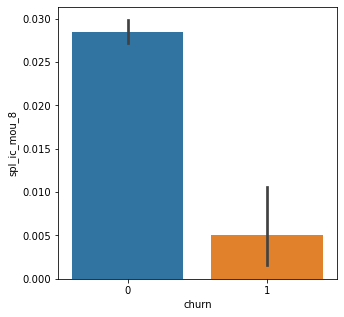

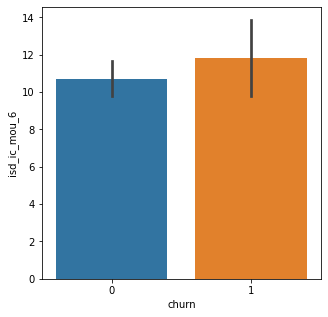

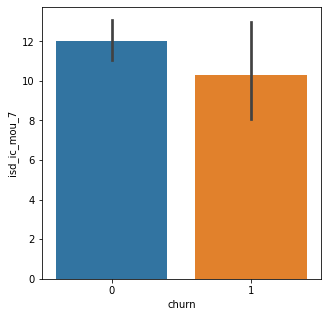

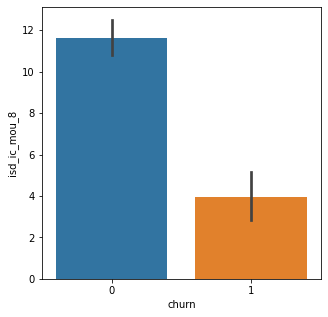

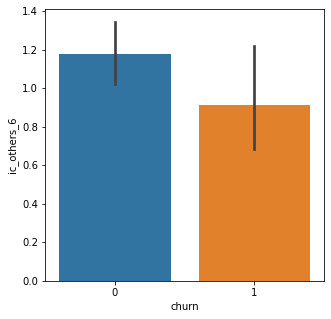

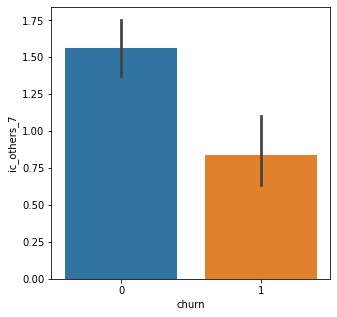

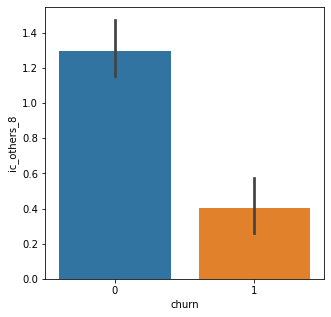

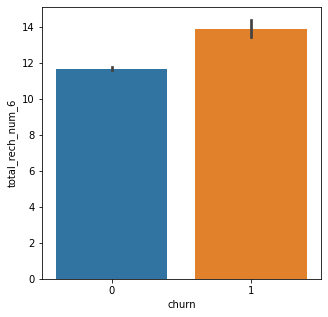

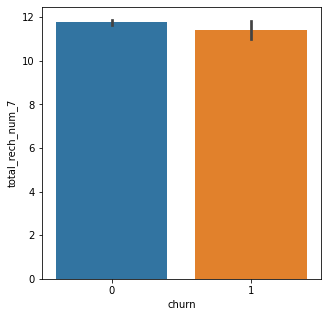

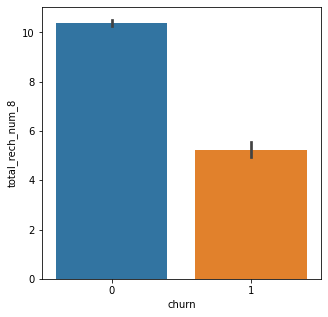

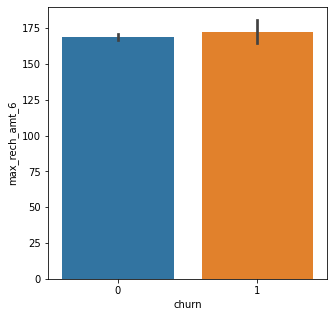

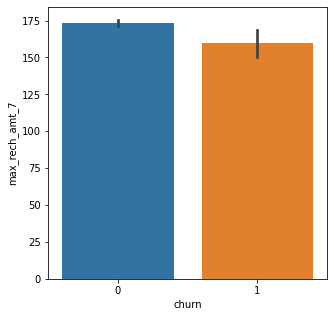

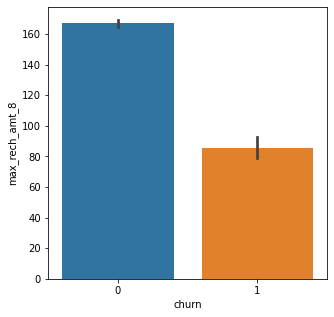

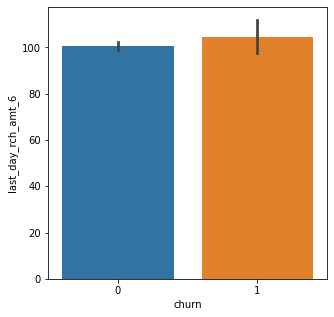

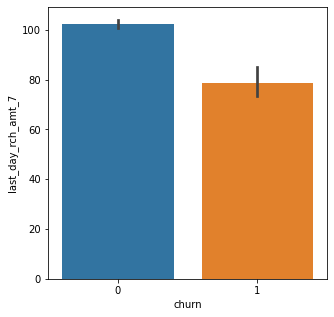

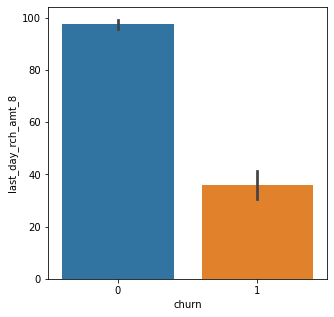

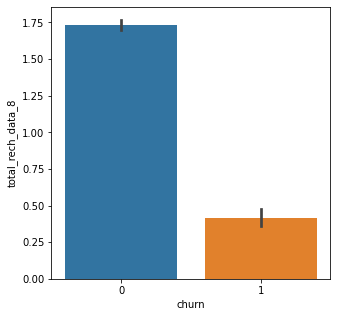

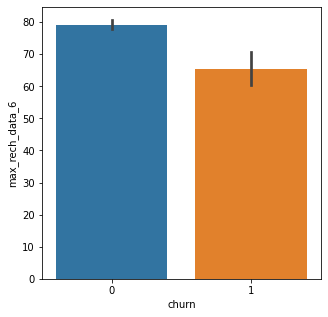

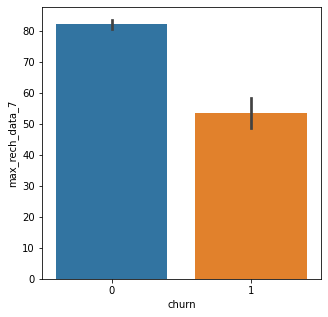

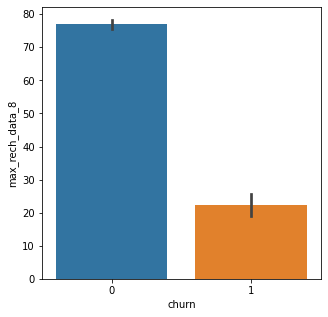

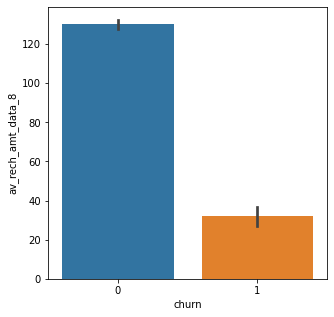

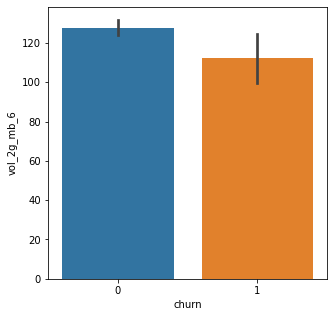

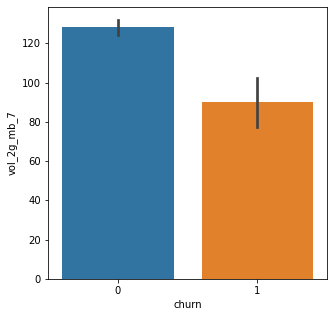

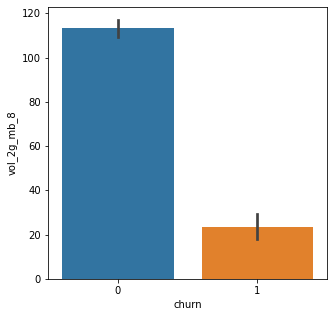

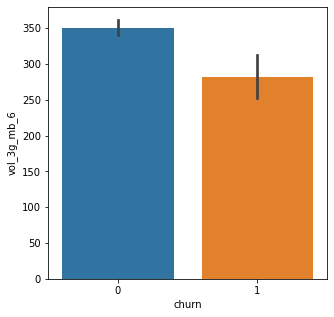

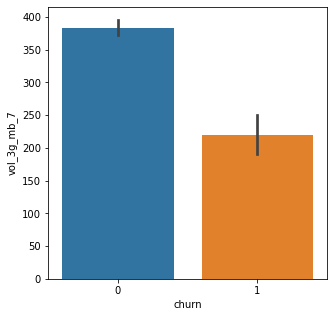

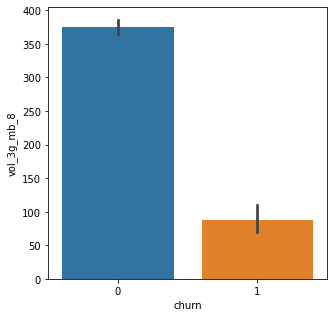

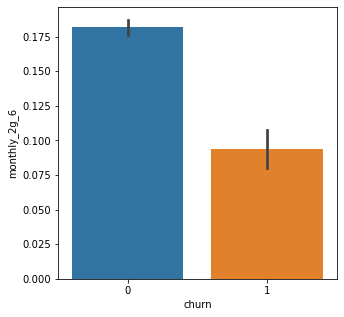

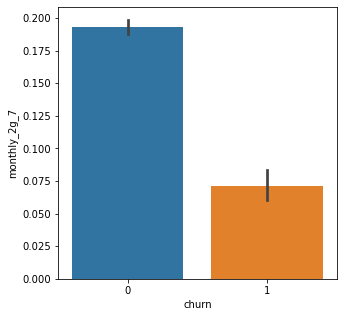

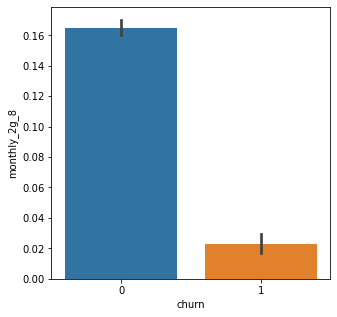

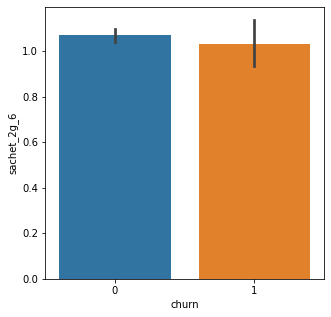

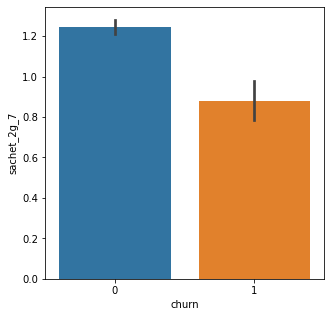

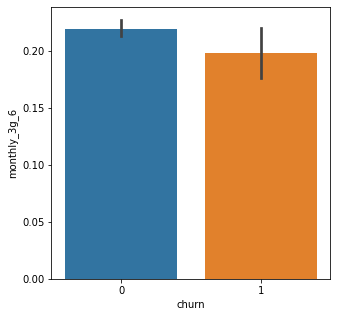

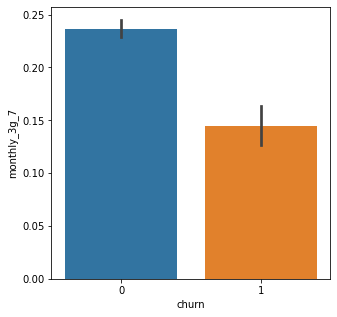

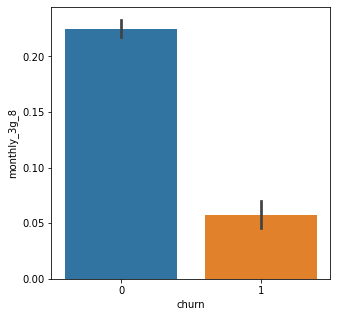

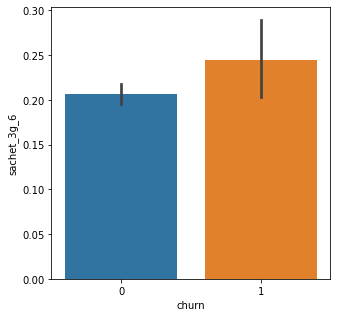

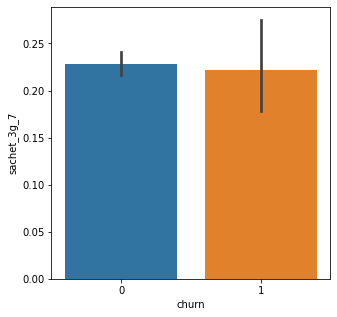

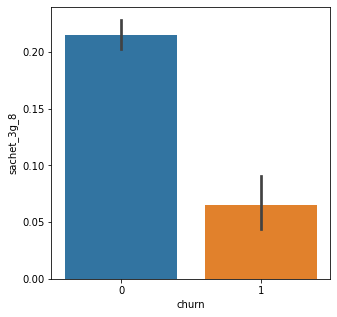

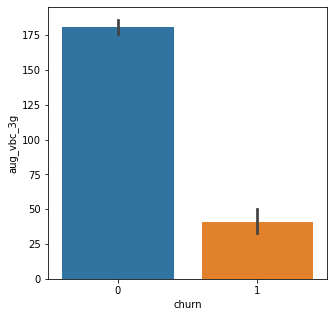

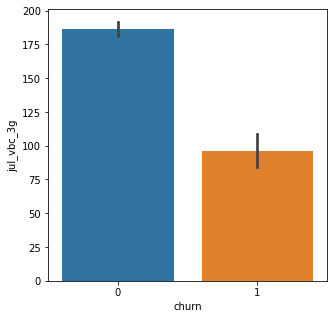

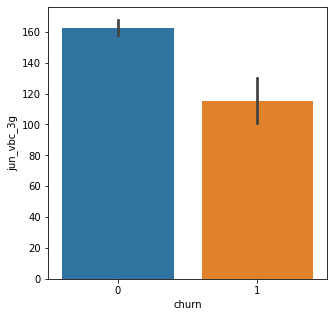

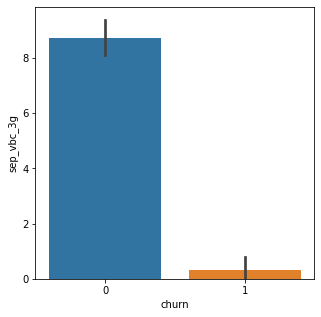

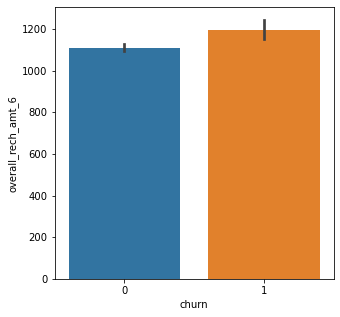

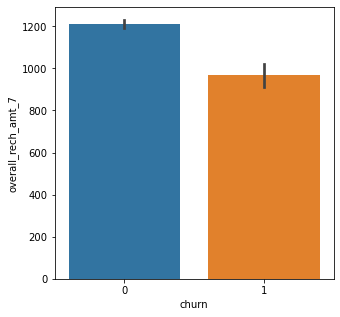

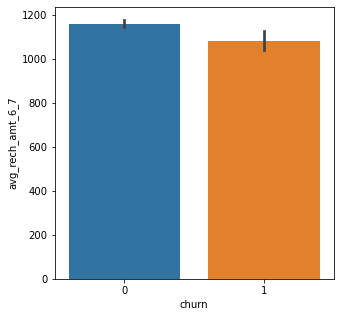

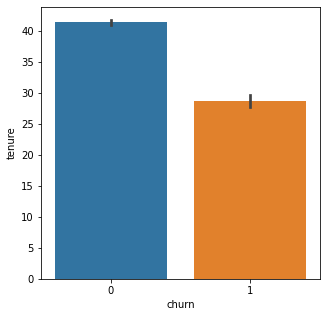

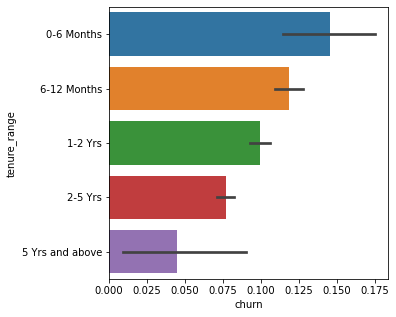

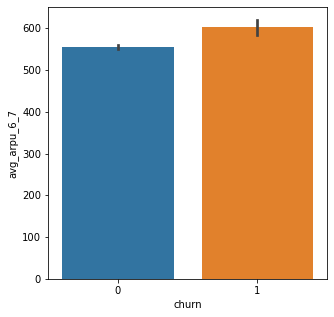

In [414]:
cont_cols = [col for col in telecom_df.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_df)
    plt.show()

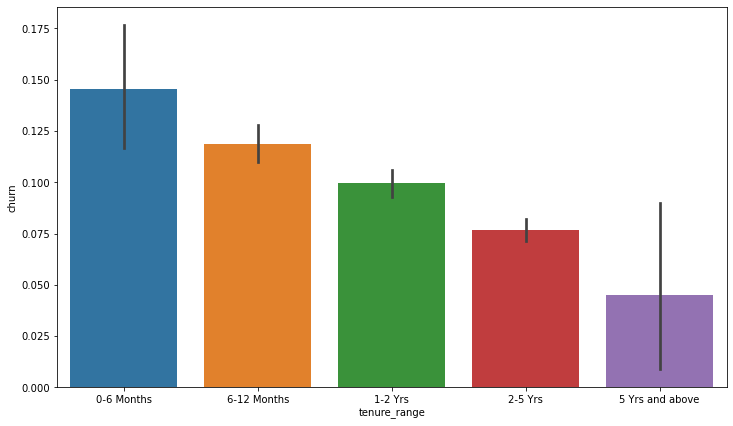

In [415]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_df)
plt.show()

- <b>It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.</b>

Text(0.5, 1.0, 'Features Correlating with Churn variable')

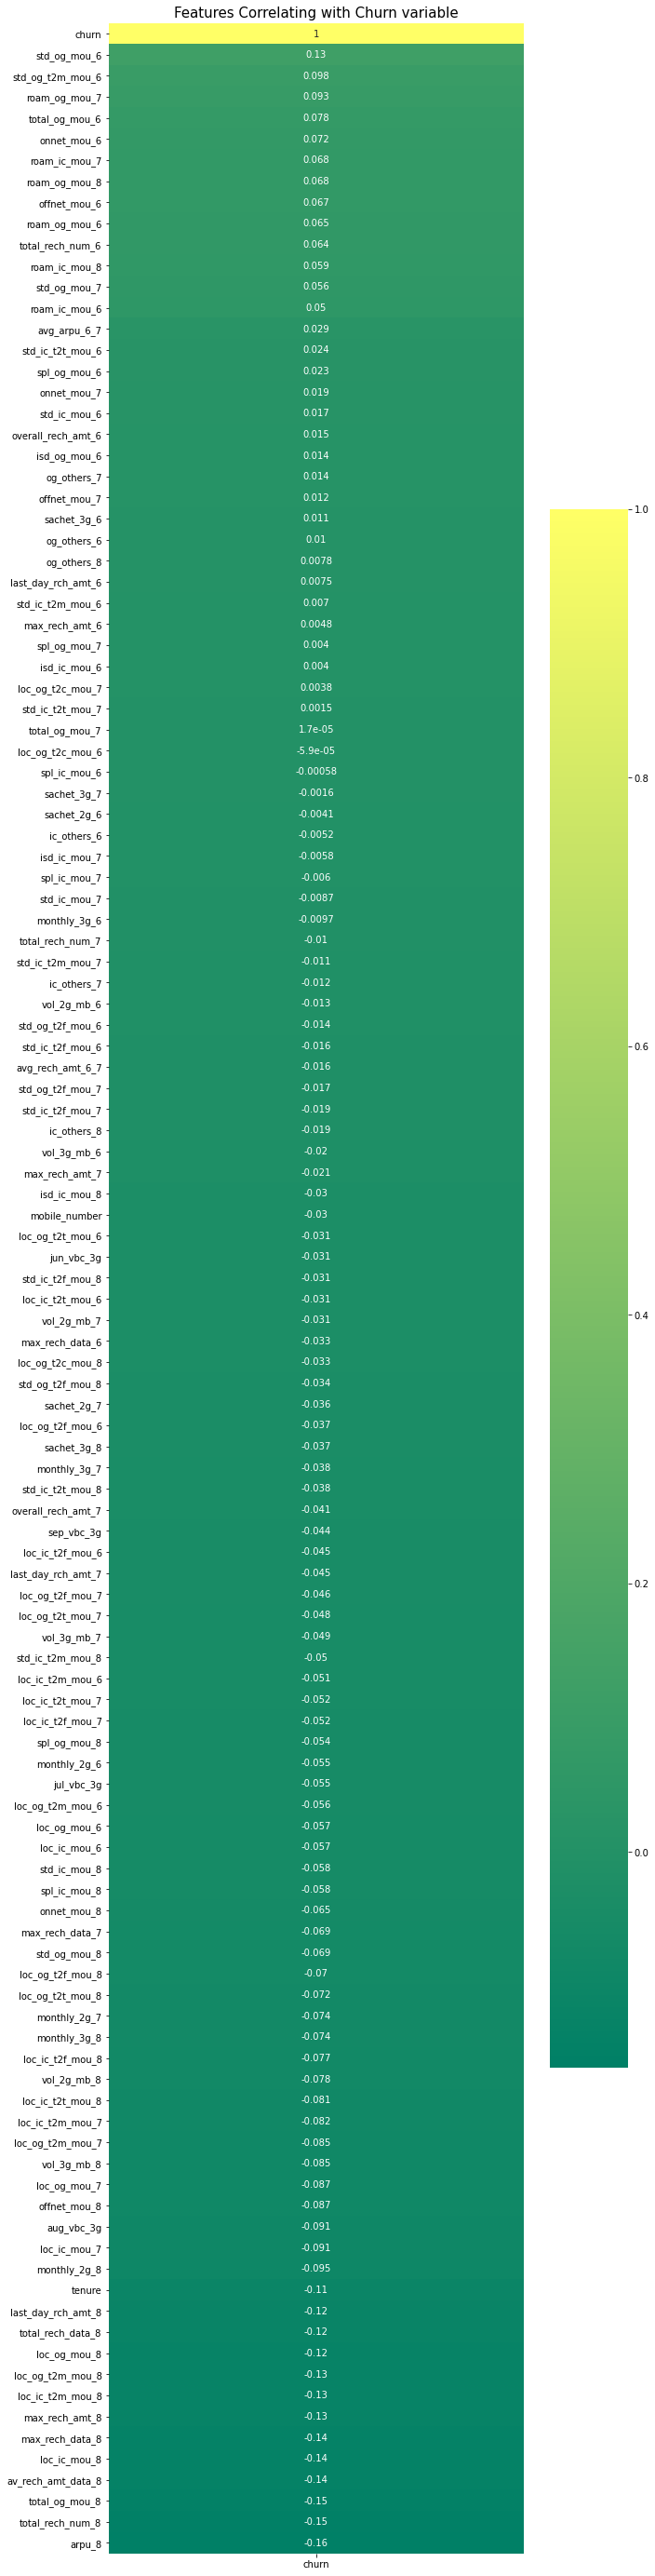

In [416]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset

plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [417]:

#telecom_df['onnet_mou_diff'] = telecom_df.onnet_mou_8 - ((telecom_df.onnet_mou_6 + telecom_df.onnet_mou_7)/2)

#telecom_df['offnet_mou_diff'] = telecom_df.offnet_mou_8 - ((telecom_df.offnet_mou_6 + telecom_df.offnet_mou_7)/2)

#telecom_df['roam_ic_mou_diff'] = telecom_df.roam_ic_mou_8 - ((telecom_df.roam_ic_mou_6 + telecom_df.roam_ic_mou_7)/2)

#telecom_df['roam_og_mou_diff'] = telecom_df.roam_og_mou_8 - ((telecom_df.roam_og_mou_6 + telecom_df.roam_og_mou_7)/2)


#telecom_df['loc_og_mou_diff'] = telecom_df.loc_og_mou_8 - ((telecom_df.loc_og_mou_6 + telecom_df.loc_og_mou_7)/2)

#telecom_df['std_og_mou_diff'] = telecom_df.std_og_mou_8 - ((telecom_df.std_og_mou_6 + telecom_df.std_og_mou_7)/2)

#telecom_df['spl_og_mou_diff'] = telecom_df.spl_og_mou_8 - ((telecom_df.spl_og_mou_6 + telecom_df.spl_og_mou_7)/2)

#telecom_df['total_og_mou_diff'] = telecom_df.total_og_mou_8 - ((telecom_df.total_og_mou_6 + telecom_df.total_og_mou_7)/2)

#telecom_df['loc_ic_mou_diff'] = telecom_df.loc_ic_mou_8 - ((telecom_df.loc_ic_mou_6 + telecom_df.loc_ic_mou_7)/2)

#telecom_df['std_ic_mou_diff'] = telecom_df.std_ic_mou_8 - ((telecom_df.std_ic_mou_6 + telecom_df.std_ic_mou_7)/2)

#telecom_df['isd_ic_mou_diff'] = telecom_df.isd_ic_mou_8 - ((telecom_df.isd_ic_mou_6 + telecom_df.isd_ic_mou_7)/2)

#telecom_df['spl_ic_mou_diff'] = telecom_df.spl_ic_mou_8 - ((telecom_df.spl_ic_mou_6 + telecom_df.spl_ic_mou_7)/2)

#telecom_df['total_rech_num_diff'] = telecom_df.total_rech_num_8 - ((telecom_df.total_rech_num_6 + telecom_df.total_rech_num_7)/2)

#telecom_df['max_rech_amt_diff'] = telecom_df.max_rech_amt_8 - ((telecom_df.max_rech_amt_6 + telecom_df.max_rech_amt_7)/2)

#telecom_df['vol_2g_mb_diff'] = telecom_df.vol_2g_mb_8 - ((telecom_df.vol_2g_mb_6 + telecom_df.vol_2g_mb_7)/2)

#telecom_df['vol_3g_mb_diff'] = telecom_df.vol_3g_mb_8 - ((telecom_df.vol_3g_mb_6 + telecom_df.vol_3g_mb_7)/2)

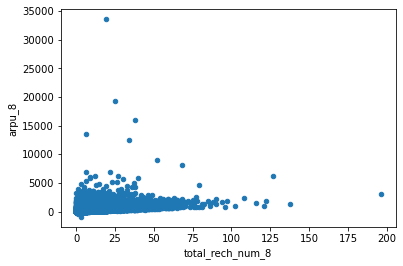

In [418]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

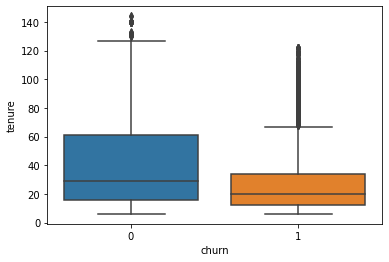

In [419]:
sns.boxplot(x = telecom_df.churn, y = telecom_df.tenure)

plt.show()

- <b>from the above plot , its clear tenured customers do no churn and they keep availing telecom services</b>

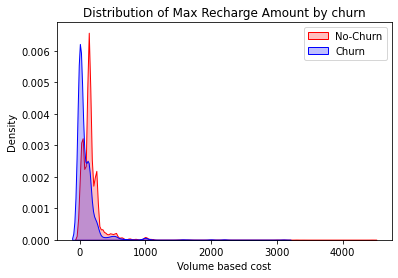

In [420]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_df.max_rech_amt_8[(telecom_df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_df.max_rech_amt_8[(telecom_df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

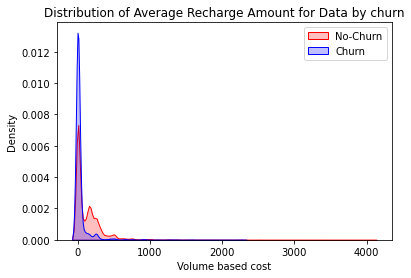

In [421]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_df.av_rech_amt_data_8[(telecom_df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_df.av_rech_amt_data_8[(telecom_df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [422]:
# Creating categories for month 8 column totalrecharge and their count
telecom_df['total_rech_data_group_8']=pd.cut(telecom_df['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_df['total_rech_num_group_8']=pd.cut(telecom_df['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15289
No_Recharge        14018
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


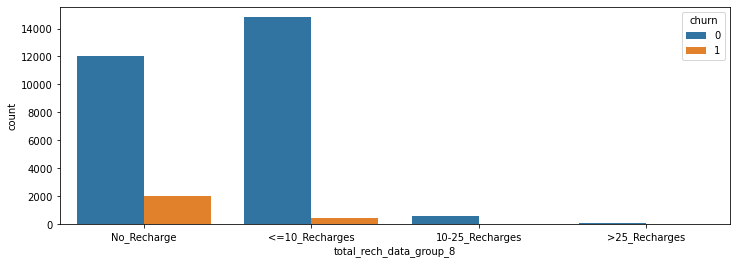

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19315
10-25_Recharges     8235
>25_Recharges       1821
No_Recharge          582
Name: total_rech_num_group_8, dtype: int64


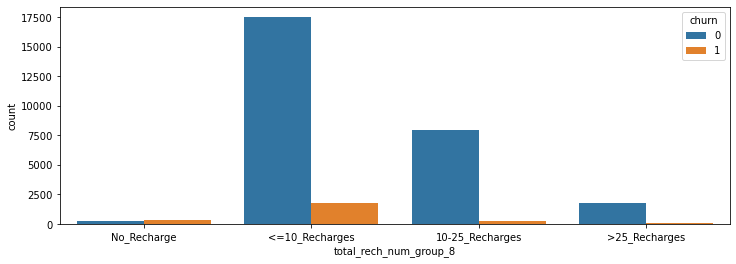

In [423]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_df['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_df['total_rech_num_group_8'].value_counts())
plt.show()

- <b>As the number of recharge rate increases, the churn rate decreases clearly.</b>

### Dummy variable creation

In [424]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_df[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [425]:
# Adding the results to the master dataframe
telecom_df = pd.concat([telecom_df, dummy], axis=1)
telecom_df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7000842753,213.803,88.14,86.89,0.00,229.63,227.13,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,7000701601,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,...,0,0,0,1,0,0,0,0,1,0
8,7001524846,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,7002124215,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,7000887461,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [426]:
# Creating a copy of the filtered dataframe
df=telecom_df[:].copy()
# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [427]:
# Cheking the dataset
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,88.14,86.89,0.00,229.63,227.13,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,...,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


# Data modeling


In [428]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [429]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,88.14,86.89,0.00,229.63,227.13,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,...,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [430]:
# lets create y dataset for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

### Train test split

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20967, 126)
Dimension of X_test: (8986, 126)


In [432]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20967 entries, 59193 to 99254
Data columns (total 126 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   arpu_8                                   float64
 1   onnet_mou_6                              float64
 2   onnet_mou_7                              float64
 3   onnet_mou_8                              float64
 4   offnet_mou_6                             float64
 5   offnet_mou_7                             float64
 6   offnet_mou_8                             float64
 7   roam_ic_mou_6                            float64
 8   roam_ic_mou_7                            float64
 9   roam_ic_mou_8                            float64
 10  roam_og_mou_6                            float64
 11  roam_og_mou_7                            float64
 12  roam_og_mou_8                            float64
 13  loc_og_t2t_mou_6                         float64
 14  loc_og_t2t_mou_7 

In [433]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()


### Feature Scaling

In [434]:
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [435]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
59193,0.036659,0.000000,0.012682,0.011077,0.080447,0.083043,0.033298,0.000000,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
41301,0.036585,0.000397,0.000000,0.000000,0.000326,0.000394,0.000691,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,0,0,0
77012,0.047504,0.020807,0.019843,0.013251,0.017060,0.025425,0.012348,0.009602,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
16823,0.046933,0.017448,0.007405,0.007083,0.021631,0.010513,0.011860,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
69457,0.033536,0.110281,0.008882,0.000765,0.007216,0.001046,0.000114,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


## Handling data imbalance

In [436]:
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [437]:
print("X_train_sm Shape:", X_train_sm.shape)
print("y_train_sm Shape:", y_train_sm.shape)

X_train_sm Shape: (38528, 126)
y_train_sm Shape: (38528,)


# Model Building

## Logistic Regression

In [438]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm
# Logistic regression model
lr = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38402
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13684.
Date:                Wed, 25 Aug 2021   Deviance:                       27369.
Time:                        18:28:46   Pearson chi2:                 2.76e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0225      0.164      0.137      0.891      -0.299       0.344
arpu_8                                     13.4929      4.273      3.158      0.002       5.119      21.867
onnet_mou_6                                37.1728     14.711      2.527      0.012       8.339      66.006
onnet_mou_7                               -11.2948     20.138     -0.561      0.575     -50.765      28.176
onnet_mou_8                               -66.7455     32.322     -2.065      0.039    -130.096      -3.395
offnet_mou_6                               46.1617     16.299      2.832      0.005      14.217      78.106
offnet_mou_7                              -11.5988     24.251     -0.478      0.632     -59.131      35.933
offnet_mou_8                              -85.7473     42.062     -2.039      0.041    -168.187      -3.308
roam_ic_mou_6                               0.7736      0.841      0.920      0.358      -0.875       2.422
roam_ic_mou_7                               7.0393      1.346      5.230      0.000       4.401       9.677
roam_ic_mou_8                              -3.1553      0.793     -3.979      0.000      -4.709      -1.601
roam_og_mou_6                             -19.5044      7.419     -2.629      0.009     -34.044      -4.964
roam_og_mou_7                               6.3840      7.096      0.900      0.368      -7.523      20.291
roam_og_mou_8                              37.0936     16.098      2.304      0.021       5.543      68.644
loc_og_t2t_mou_6                         4.015e+04   1.92e+04      2.086      0.037    2424.972    7.79e+04
loc_og_t2t_mou_7                        -6.845e+04   1.61e+04     -4.242      0.000      -1e+05   -3.68e+04
loc_og_t2t_mou_8                        -8.398e+04   2.71e+04     -3.098      0.002   -1.37e+05   -3.08e+04
loc_og_t2m_mou_6                         2.952e+04   1.42e+04      2.086      0.037    1777.461    5.73e+04
loc_og_t2m_mou_7                        -4.355e+04   1.03e+04     -4.242      0.000   -6.37e+04   -2.34e+04
loc_og_t2m_mou_8                        -3.874e+04   1.25e+04     -3.097      0.002   -6.33e+04   -1.42e+04
loc_og_t2f_mou_6                         9155.6780   4387.993      2.087      0.037     555.369    1.78e+04
loc_og_t2f_mou_7                        -1.144e+04   2695.563     -4.246      0.000   -1.67e+04   -6161.793
loc_og_t2f_mou_8                        -4591.1429   1483.322     -3.095      0.002   -7498.401   -1683.885
loc_og_t2c_mou_6                           -4.9544      1.012     -4.896      0.000      -6.938      -2.971
loc_og_t2c_mou_7                            6.2332      1.539      4.051      0.000       3.217       9.249
loc_og_t2c_mou_8                            2.5112      1.2

### Logistic Regression using Feature Selection (RFE method)

In [439]:
logreg = LogisticRegression()
# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [440]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [441]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 11),
 ('onnet_mou_6', False, 7),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 99),
 ('offnet_mou_6', False, 8),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 72),
 ('roam_ic_mou_7', False, 27),
 ('roam_ic_mou_8', False, 94),
 ('roam_og_mou_6', False, 71),
 ('roam_og_mou_7', False, 48),
 ('roam_og_mou_8', False, 3),
 ('loc_og_t2t_mou_6', False, 102),
 ('loc_og_t2t_mou_7', False, 85),
 ('loc_og_t2t_mou_8', False, 10),
 ('loc_og_t2m_mou_6', False, 62),
 ('loc_og_t2m_mou_7', False, 32),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 82),
 ('loc_og_t2f_mou_7', False, 69),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 50),
 ('loc_og_t2c_mou_7', False, 18),
 ('loc_og_t2c_mou_8', False, 84),
 ('loc_og_mou_6', False, 105),
 ('loc_og_mou_7', False, 104),
 ('loc_og_mou_8', False, 5),
 ('std_og_t2m_mou_6', False, 65),
 ('std_og_t2f_mou_6', False, 51),
 ('std_og_t2f_mou_7', False, 74),
 ('std_og_t2f_mou_8', Fa

In [442]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


#### Assessing the model with StatsModels

In [443]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14542.
Date:                Wed, 25 Aug 2021   Deviance:                       29085.
Time:                        18:30:03   Pearson chi2:                 3.26e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0463      0.067     -0.688      0.491      -0.178       0.086
onnet_mou_7            8.5042      0.457     18.600      0.000       7.608       9.400
offnet_mou_7           8.1567      0.540     15.106      0.000       7.098       9.215
offnet_mou_8           8.1781      1.461      5.599      0.000       5.316      11.041
loc_og_t2m_mou_8      -8.4782      0.922     -9.195      0.000     -10.285      -6.671
loc_og_t2f_mou_8      -1.1549      0.973     -1.187      0.235      -3.062       0.752
total_og_mou_8       -27.5057      1.042    -26.407      0.000     -29.547     -25.464
loc_ic_t2t_mou_8    -623.3477     15.171    -41.088      0.000    -653.083    -593.613
loc_ic_t2m_mou_8    -573.4815     13.865    -41.363      0.000    -600.656    -546.307
loc_ic_t2f_mou_8    -258.9407      6.219    -41.638      0.000    -271.130    -246.752
loc_ic_mou_8         819.7146     20.321     40.337      0.000     779.885     859.544
std_ic_mou_8          -9.9603      1.424     -6.994      0.000     -12.752      -7.169
spl_ic_mou_8         -14.3657      1.332    -10.781      0.000     -16.977     -11.754
total_rech_num_6       1.4078      0.642      2.192      0.028       0.149       2.666
total_rech_num_8      -3.1810      0.552     -5.766      0.000      -4.262      -2.100
last_day_rch_amt_8   -10.8986      0.631    -17.276      0.000     -12.135      -9.662
total_rech_data_8     -4.5017      0.535     -8.416      0.000      -5.550      -3.453
av_rech_amt_data_8   -15.7858      0.751    -21.027      0.000     -17.257     -14.314
vol_2g_mb_8          -10.2829      1.064     -9.663      0.000     -12.369      -8.197
aug_vbc_3g            -7.0991      0.993     -7.150      0.000      -9.045      -5.153
avg_arpu_6_7          28.7153      2.037     14.096      0.000      24.723      32.708
======================================================================================
"""

In [444]:
# as loc_og_t2f_mou_8 has the highest p value o.235 we can drop it 
rfe_columns_1=rfe_columns.drop('loc_og_t2f_mou_8',1)

# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14543.
Date:                Wed, 25 Aug 2021   Deviance:                       29086.
Time:                        18:30:03   Pearson chi2:                 2.74e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0430      0.067     -0.640      0.522      -0.175       0.089
onnet_mou_7            8.5380      0.457     18.701      0.000       7.643       9.433
offnet_mou_7           8.1880      0.540     15.176      0.000       7.131       9.245
offnet_mou_8           8.1813      1.461      5.600      0.000       5.318      11.045
loc_og_t2m_mou_8      -8.6435      0.914     -9.454      0.000     -10.435      -6.852
total_og_mou_8       -27.5350      1.042    -26.430      0.000     -29.577     -25.493
loc_ic_t2t_mou_8    -624.0497     15.160    -41.163      0.000    -653.763    -594.336
loc_ic_t2m_mou_8    -574.0980     13.855    -41.435      0.000    -601.254    -546.942
loc_ic_t2f_mou_8    -259.9676      6.164    -42.178      0.000    -272.048    -247.887
loc_ic_mou_8         820.6482     20.307     40.412      0.000     780.847     860.449
std_ic_mou_8         -10.0117      1.425     -7.026      0.000     -12.804      -7.219
spl_ic_mou_8         -14.3497      1.332    -10.770      0.000     -16.961     -11.738
total_rech_num_6       1.4475      0.642      2.255      0.024       0.190       2.706
total_rech_num_8      -3.1741      0.552     -5.754      0.000      -4.255      -2.093
last_day_rch_amt_8   -10.9253      0.630    -17.330      0.000     -12.161      -9.690
total_rech_data_8     -4.4935      0.535     -8.404      0.000      -5.541      -3.446
av_rech_amt_data_8   -15.7796      0.751    -21.023      0.000     -17.251     -14.308
vol_2g_mb_8          -10.2616      1.064     -9.646      0.000     -12.347      -8.177
aug_vbc_3g            -7.1136      0.993     -7.163      0.000      -9.060      -5.167
avg_arpu_6_7          28.5295      2.028     14.066      0.000      24.554      32.505
======================================================================================
"""

In [445]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.44822146, 0.15471571, 0.00352465, 0.05505111, 0.46102538,
       0.06728304, 0.76665953, 0.0402874 , 0.00137367, 0.02931623])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [446]:
y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_prob':y_train_sm_pred})
print(y_train_sm_pred_final.head())

y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
#Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0
# Viewing the prediction results
print(y_train_sm_pred_final.head())

   Churn  Churn_prob
0      0    0.448221
1      0    0.154716
2      0    0.003525
3      0    0.055051
4      0    0.461025
   Churn  Churn_prob  churn_pred
0      0    0.448221           0
1      0    0.154716           0
2      0    0.003525           0
3      0    0.055051           0
4      0    0.461025           0


In [447]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_pred )
print(confusion)

[[16388  2876]
 [ 3064 16200]]


In [448]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8458264119601329


### Checking VIFs

In [449]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_1].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_1].values, i) for i in range(X_train_sm[rfe_columns_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,loc_ic_mou_8,1470.54
6,loc_ic_t2m_mou_8,684.15
5,loc_ic_t2t_mou_8,292.96
7,loc_ic_t2f_mou_8,21.23
4,total_og_mou_8,7.70
18,avg_arpu_6_7,7.17
2,offnet_mou_8,6.99
11,total_rech_num_6,4.07
12,total_rech_num_8,3.95
1,offnet_mou_7,3.24


- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'loc_ic_t2m_mou_8' has the highest VIF. So let's start by dropping that.

In [450]:
rfe_columns_1 = rfe_columns_1.drop('loc_ic_t2m_mou_8', 1)
rfe_columns_1

Index(['onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')

In [451]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38509
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16108.
Date:                Wed, 25 Aug 2021   Deviance:                       32215.
Time:                        18:30:06   Pearson chi2:                 7.48e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6392      0.061     10.452      0.000       0.519       0.759
onnet_mou_7           13.7627      0.509     27.039      0.000      12.765      14.760
offnet_mou_7           3.4621      0.482      7.178      0.000       2.517       4.407
offnet_mou_8          37.1716      1.481     25.091      0.000      34.268      40.075
loc_og_t2m_mou_8     -12.0687      0.864    -13.972      0.000     -13.762     -10.376
total_og_mou_8       -47.9410      1.198    -40.031      0.000     -50.288     -45.594
loc_ic_t2t_mou_8      -5.5073      1.716     -3.208      0.001      -8.872      -2.143
loc_ic_t2f_mou_8     -28.2110      2.193    -12.863      0.000     -32.510     -23.912
loc_ic_mou_8         -12.8973      1.085    -11.886      0.000     -15.024     -10.771
std_ic_mou_8         -12.7548      1.477     -8.637      0.000     -15.649      -9.860
spl_ic_mou_8         -17.8227      1.390    -12.824      0.000     -20.547     -15.099
total_rech_num_6       4.4189      0.639      6.911      0.000       3.166       5.672
total_rech_num_8      -9.0475      0.582    -15.536      0.000     -10.189      -7.906
last_day_rch_amt_8   -14.9564      0.605    -24.728      0.000     -16.142     -13.771
total_rech_data_8     -8.7166      0.562    -15.516      0.000      -9.818      -7.616
av_rech_amt_data_8    -8.8510      0.650    -13.617      0.000     -10.125      -7.577
vol_2g_mb_8          -14.6730      1.077    -13.618      0.000     -16.785     -12.561
aug_vbc_3g           -12.7533      0.982    -12.982      0.000     -14.679     -10.828
avg_arpu_6_7          23.7088      1.843     12.862      0.000      20.096      27.322
======================================================================================
"""

In [452]:

# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_prob':y_train_sm_pred})
print(y_train_sm_pred_final.head())

y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
#Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0
# Viewing the prediction results
print(y_train_sm_pred_final.head())

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_pred )
print(confusion)

# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_pred))

   Churn  Churn_prob
0      0    0.396565
1      0    0.187261
2      0    0.005871
3      0    0.085333
4      0    0.655200
   Churn  Churn_prob  churn_pred
0      0    0.396565           0
1      0    0.187261           0
2      0    0.005871           0
3      0    0.085333           0
4      0    0.655200           1
[[15640  3624]
 [ 2982 16282]]
The overall accuracy of the model is: 0.8285402823920266


#### Let's check the VIFs again

In [453]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_1].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_1].values, i) for i in range(X_train_sm[rfe_columns_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,7.34
2,offnet_mou_8,6.56
17,avg_arpu_6_7,6.42
7,loc_ic_mou_8,4.68
10,total_rech_num_6,4.01
11,total_rech_num_8,3.78
1,offnet_mou_7,3.10
0,onnet_mou_7,2.87
14,av_rech_amt_data_8,2.57
5,loc_ic_t2t_mou_8,2.53


- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Metrics beyond simply accuracy

In [454]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.845203488372093
Specificity =  0.8118770764119602
False Positive Rate =  0.18812292358803986
Precision =  0.817944338390435
True Negative Prediction Rate =  0.8398668241864461


## Plotting the ROC Curve
#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [455]:

# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

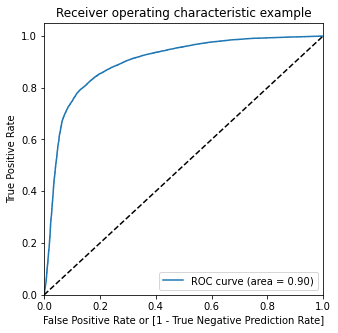

In [456]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob)

Finding Optimal Cutoff Point

In [457]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.396565,0,1,1,1,1,0,0,0,0,0,0
1,0,0.187261,0,1,1,0,0,0,0,0,0,0,0
2,0,0.005871,0,1,0,0,0,0,0,0,0,0,0
3,0,0.085333,0,1,0,0,0,0,0,0,0,0,0
4,0,0.655200,1,1,1,1,1,1,1,1,0,0,0


In [458]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.676910     0.979288     0.374533
0.2          0.2  0.742421     0.951983     0.532859
0.3          0.3  0.787038     0.923277     0.650799
0.4          0.4  0.813253     0.886316     0.740189
0.5          0.5  0.828540     0.845203     0.811877
0.6          0.6  0.831421     0.793657     0.869186
0.7          0.7  0.820105     0.726744     0.913466
0.8          0.8  0.763497     0.576827     0.950166
0.9          0.9  0.591985     0.202917     0.981053


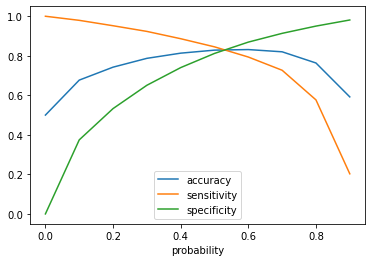

In [459]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimm point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [460]:
# Let's create columns with refined probability cutoffs 
numbers = [0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.49,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.396565,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.187261,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.005871,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.085333,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.655200,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [461]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.46         0.46  0.823946     0.862074     0.785818
0.47         0.47  0.825270     0.857818     0.792722
0.48         0.48  0.827087     0.854755     0.799419
0.49         0.49  0.827969     0.850187     0.805752
0.50         0.50  0.828540     0.845203     0.811877
0.51         0.51  0.829864     0.840324     0.819404
0.52         0.52  0.829994     0.834562     0.825426
0.53         0.53  0.830669     0.829319     0.832018
0.54         0.54  0.830721     0.824336     0.837105
0.55         0.55  0.830591     0.819093     0.842089
0.56         0.56  0.830305     0.813538     0.847072
0.57         0.57  0.830279     0.808036     0.852523
0.58         0.58  0.830721     0.803571     0.857870
0.59         0.59  0.831162     0.798900     0.863424


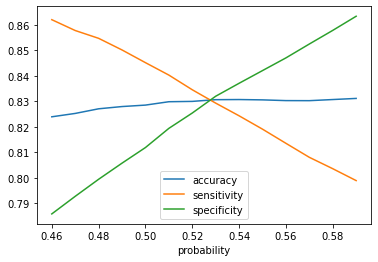

In [462]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

##### From the above graph we can conclude, 
the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53



In [463]:
#### From the curve above, 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Churn_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.396565,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.187261,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.005871,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.085333,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.655200,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [464]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8306686046511628


In [465]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16028  3236]
 [ 3288 15976]]


In [466]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))
print("Recall = ", TP2 / float(TP2 + FN2))
# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8293189368770764
Specificity =  0.8320182724252492
False Positive Rate =  0.16798172757475083
Precision =  0.8315636060795336
Recall =  0.8293189368770764
True Negative Prediction Rate =  0.8297784220335473


### Precision and recall tradeoff

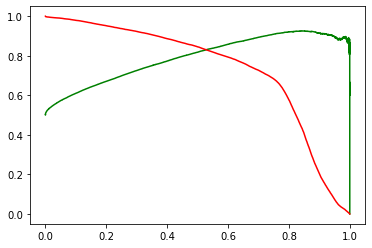

In [467]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

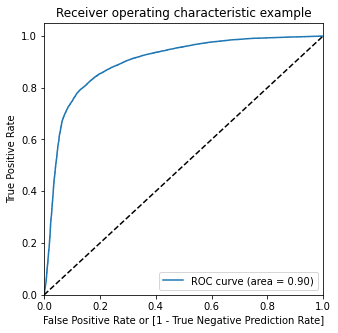

In [468]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob)

#### Making predictions on the test set
Transforming and feature selection for test data

In [469]:
X_test[rfe_columns_1].head()

,onnet_mou_7,offnet_mou_7,offnet_mou_8,loc_og_t2m_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_6,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,aug_vbc_3g,avg_arpu_6_7
5222,318.76,594.91,169.19,2.71,909.61,0.00,0.00,5.88,36.16,0.00,3,11,179,2.0,324.0,11.62,0.00,512.9705
95306,9.84,69.98,112.21,93.83,118.08,46.34,0.00,1607.94,0.00,0.00,3,3,130,1.0,49.0,54.30,0.00,218.3260
14779,159.16,552.53,477.96,124.01,523.16,44.53,4.13,249.66,65.46,0.00,26,9,50,0.0,0.0,0.00,0.00,622.2600
11458,4.61,15.06,35.39,30.93,50.26,30.81,6.83,89.89,1.16,0.00,15,10,25,3.0,248.0,12.76,702.94,434.0035
21349,32.06,1121.63,743.84,5.56,766.86,0.00,0.00,0.50,0.98,0.25,10,6,0,0.0,0.0,0.00,0.00,447.7575


In [470]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
5222,0.046174,0.045001,0.039786,0.068859,0.062212,0.061539,0.012079,0.0,0.000000,0.0,...,1,0,0,0,1,0,1,0,0,0
95306,0.031917,0.000811,0.001228,0.000522,0.012859,0.007239,0.008011,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
14779,0.037384,0.048129,0.019865,0.003668,0.075659,0.057156,0.034122,0.0,0.015352,0.0,...,0,0,0,1,0,0,0,1,0,0
11458,0.035442,0.001577,0.000575,0.001229,0.002575,0.001558,0.002527,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
21349,0.035979,0.011009,0.004002,0.002140,0.087225,0.116025,0.053104,0.0,0.000000,0.0,...,0,0,0,1,0,0,0,1,0,0


In [471]:
# Feature selection
X_test=X_test[rfe_columns_1]
X_test.head()

,onnet_mou_7,offnet_mou_7,offnet_mou_8,loc_og_t2m_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_6,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,aug_vbc_3g,avg_arpu_6_7
5222,0.039786,0.061539,0.012079,0.000546,0.064773,0.000000,0.0000,0.001091,0.006070,0.000000,0.009772,0.056122,0.040234,0.04,0.079783,0.001045,0.000000,0.039230
95306,0.001228,0.007239,0.008011,0.018912,0.008408,0.011576,0.0000,0.298389,0.000000,0.000000,0.009772,0.015306,0.029220,0.02,0.012066,0.004884,0.000000,0.030076
14779,0.019865,0.057156,0.034122,0.024995,0.037254,0.011124,0.0026,0.046330,0.010988,0.000000,0.084691,0.045918,0.011238,0.00,0.000000,0.000000,0.000000,0.042626
11458,0.000575,0.001558,0.002527,0.006234,0.003579,0.007696,0.0043,0.016681,0.000195,0.000000,0.048860,0.051020,0.005619,0.06,0.061069,0.001148,0.054423,0.036777
21349,0.004002,0.116025,0.053104,0.001121,0.054608,0.000000,0.0000,0.000093,0.000165,0.040128,0.032573,0.030612,0.000000,0.00,0.000000,0.000000,0.000000,0.037204


In [472]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [473]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 5222     0.071696
95306    0.023280
14779    0.554841
11458    0.247146
21349    0.615152
47812    0.258296
50370    0.866185
73619    0.013791
61360    0.001058
38365    0.634074
dtype: float64


In [474]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
5222,0.071696
95306,0.023280
14779,0.554841
11458,0.247146
21349,0.615152


In [475]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5222,0
95306,0
14779,0
11458,0
21349,0


In [476]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
5222,0,0.071696
95306,0,0.023280
14779,0,0.554841
11458,0,0.247146
21349,0,0.615152


In [477]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.53 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
5222,0,0.071696,0
95306,0,0.023280,0
14779,0,0.554841,1
11458,0,0.247146,0
21349,0,0.615152,1


In [478]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8259514800801246

In [479]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6846 1410]
 [ 154  576]]


In [480]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

metricLR=[]
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))
metricLR.append(TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ", TN3 / float(TN3+FP3))
metricLR.append(TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))
metricLR.append(FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))
metricLR.append(TP3 / float(TP3+FP3))

print ("Recall = ", TP3 / float(TP3 + FN3))
metricLR.append(TP3 / float(TP3 + FN3))
# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))
metricLR.append(TN3 / float(TN3+FN3))

Sensitivity =  0.7890410958904109
Specificity =  0.8292151162790697
False Positive Rate =  0.17078488372093023
Precision =  0.29003021148036257
Recall =  0.7890410958904109
True Negative Prediction Rate =  0.978


In [481]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  79.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



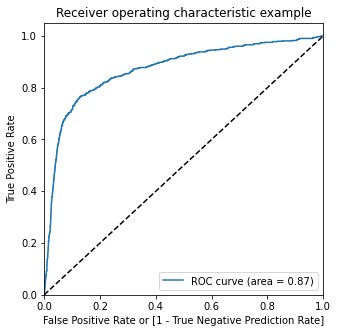

In [482]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

- <b>The AUC score for train dataset is 0.90 and the test dataset is 0.87.
- This model can be considered as a good model.</b>

## Logistic Regression using PCA

In [483]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (20967, 126)
Dimension of X_test: (8986, 126)
Dimension of X_train_sm Shape: (38528, 126)
Dimension of y_train_sm Shape: (38528,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.036659,0.000000,0.012682,0.011077,0.080447,0.083043,0.033298,0.000000,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,0.036585,0.000397,0.000000,0.000000,0.000326,0.000394,0.000691,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,0,0,0
2,0.047504,0.020807,0.019843,0.013251,0.017060,0.025425,0.012348,0.009602,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
3,0.046933,0.017448,0.007405,0.007083,0.021631,0.010513,0.011860,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,0.033536,0.110281,0.008882,0.000765,0.007216,0.001046,0.000114,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


In [484]:
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [485]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38528, 126)
Dimension of X_test_pca:  (8986, 126)


In [486]:
#Viewing the PCA components
pca.components_

array([[ 7.02079791e-03,  5.50607551e-03,  1.26230147e-02, ...,
        -1.22161782e-02,  1.23070531e-01, -2.56916607e-04],
       [-7.70836985e-05, -5.54374390e-04,  9.60664517e-04, ...,
         6.85240661e-01, -7.20412131e-01,  9.28541063e-05],
       [ 3.21436469e-03, -2.29314401e-02, -1.58713024e-02, ...,
         8.11856873e-02,  6.62919429e-02,  1.59797714e-03],
       ...,
       [ 1.67927942e-06, -1.70667993e-06,  1.28235114e-06, ...,
         2.11969137e-08, -3.18126468e-09, -3.79731736e-08],
       [-5.90452175e-07, -2.24784383e-06,  4.04187830e-06, ...,
         1.08139405e-08, -5.10712916e-09,  2.13866821e-08],
       [ 0.00000000e+00, -3.60260889e-16, -2.92894707e-15, ...,
        -1.61790994e-18,  6.75128780e-18, -1.81594154e-18]])

## Performing Logistic Regression

In [487]:

logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (8986, 1)


In [488]:

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6727 1529]
 [ 143  587]] 

Accuracy of the logistic regression model with PCA:  0.8139327843311819


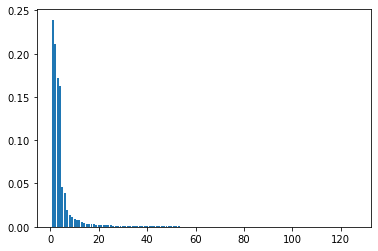

In [489]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

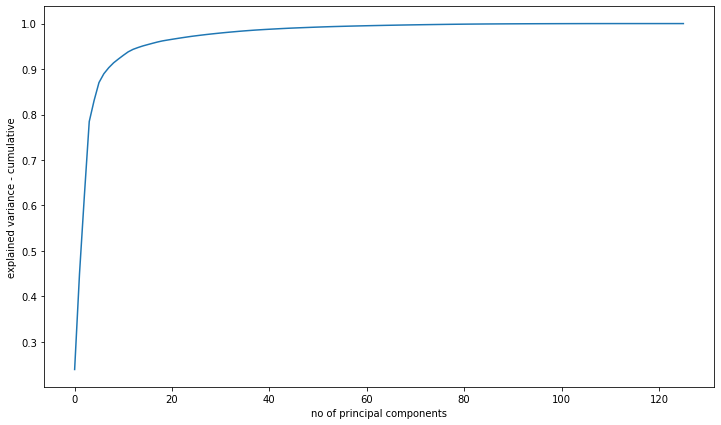

In [490]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [491]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.9, 45. , 62.2, 78.5, 83.1, 87. , 88.9, 90.2, 91.3, 92.1, 92.9,
       93.7, 94.2, 94.6, 95. , 95.3, 95.6, 95.9, 96.1, 96.3, 96.5, 96.7,
       96.9, 97.1, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1,
       98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

*90% of the data can be explained with 8 PCA components

Fitting the dataset with the 8 explainable components

In [492]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38528, 15)
Dimension for Test dataset using PCA:  (8986, 15)


In [493]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (8986, 1)


In [494]:
# Checking the Confusion matrix
confusion_PCA = metrics.confusion_matrix(y_test,y_pred_8)
print("Confusion Matrix\n",confusion_PCA)

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matrix
 [[6195 2061]
 [ 192  538]]
Accuracy of the logistic regression model with PCA:  0.7492766525706654


In [495]:
# Calculating model validation parameters
metricLRWithPCA=[]

TP4 = confusion_PCA[1,1] # true positive 
TN4 = confusion_PCA[0,0] # true negatives
FP4 = confusion_PCA[0,1] # false positives
FN4 = confusion_PCA[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP4 / float(TP4+FN4))
metricLRWithPCA.append(TP4 / float(TP4+FN4))

# Let us calculate specificity
print("Specificity = ",TN4 / float(TN4+FP4))
metricLRWithPCA.append(TN4 / float(TN4+FP4))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP4/ float(TN4+FP4))
metricLRWithPCA.append(FP4/ float(TN4+FP4))

# positive predictive value 
print ("Precision = ",TP4 / float(TP4+FP4))
metricLRWithPCA.append(TP4 / float(TP4+FP4))

print ("Recall = ", TP4 / float(TP4 + FN4))
metricLRWithPCA.append(TP4 / float(TP4 + FN4))
# Negative predictive value
print ("True Negative Prediction Rate = ",TN4 / float(TN4+FN4))
metricLRWithPCA.append(TN4 / float(TN4+FN4))

Sensitivity =  0.736986301369863
Specificity =  0.7503633720930233
False Positive Rate =  0.24963662790697674
Precision =  0.2070026933435937
Recall =  0.736986301369863
True Negative Prediction Rate =  0.9699389384687647


In [496]:
resultTable = {'Metric':["Sensitivity ", "Specificity", "False Positive Rate", "Precision ", "Recall ", "True NegativeRate"],
              'Logistic regression':metricLR}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Logistic regression'])
ls_metric = pd.Series(metricLRWithPCA, name ='Logistic regressionWithPCA')
final = pd.concat([rg_metric,ls_metric],axis=1)
final


,Metric,Logistic regression,Logistic regressionWithPCA
0,Sensitivity,0.789041,0.736986
1,Specificity,0.829215,0.750363
2,False Positive Rate,0.170785,0.249637
3,Precision,0.290030,0.207003
4,Recall,0.789041,0.736986
5,True NegativeRate,0.978000,0.969939


- <b>Logistic regression is better than the Logistic Regression with PCA</b>

## PCA

In [497]:

pca = PCA(svd_solver='randomized', random_state=42)


#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [498]:
print(pca.components_)
colnames = list(X_train.columns)
# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
# pcs_df.head(10)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 5.26889198e-03  1.12390707e-02  1.54854201e-02 ...  7.07309502e-02
   2.17562866e-02 -1.62139123e-03]
 [ 8.55227151e-04  4.29898474e-04 -7.88822564e-04 ... -6.15156883e-01
   7.77149268e-01 -9.57875238e-04]
 [ 6.44860569e-04 -2.36859733e-02 -2.11837006e-02 ...  1.83444071e-02
  -8.33862332e-02  8.09446973e-04]
 ...
 [-1.74757979e-07  7.67739432e-07 -4.94649938e-07 ...  2.15487831e-08
   7.91888776e-09 -4.27531022e-08]
 [ 3.29264612e-08 -1.83772605e-06  1.98093036e-06 ...  2.94424855e-09
  -1.04002678e-08  2.81755569e-08]
 [-0.00000000e+00 -5.83857772e-16  1.20977249e-15 ...  2.39110992e-18
   1.95648026e-17  2.78287228e-17]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.005269,0.000855,0.000645,0.000104,0.007749,0.009098,0.027991,0.026182,-0.013451,0.006591,arpu_8
1,0.011239,0.000430,-0.023686,-0.002037,0.010806,-0.003744,0.174827,-0.050158,-0.091241,0.160569,onnet_mou_6
2,0.015485,-0.000789,-0.021184,-0.001893,0.020297,0.000081,0.172800,-0.049184,-0.084442,0.155828,onnet_mou_7
3,0.014772,0.000335,-0.010857,-0.000732,0.020353,0.006781,0.109053,-0.021612,-0.044608,0.090276,onnet_mou_8
4,0.010455,-0.001206,-0.021107,-0.001623,0.008964,0.011840,0.186297,0.049468,-0.100571,0.096172,offnet_mou_6
5,0.013506,-0.001603,-0.017863,-0.000757,0.014031,0.011378,0.167743,0.044997,-0.081112,0.083512,offnet_mou_7
6,0.012539,-0.000104,-0.008146,-0.000064,0.015847,0.013869,0.098969,0.039226,-0.037816,0.039370,offnet_mou_8
7,0.000470,0.000892,-0.001842,-0.000798,-0.002255,0.002137,0.005037,-0.000196,0.001587,-0.007669,roam_ic_mou_6
8,-0.000130,0.000182,-0.001265,-0.000412,-0.001664,-0.000450,0.001268,-0.001472,0.001609,-0.006048,roam_ic_mou_7
9,0.000417,0.000164,-0.000683,-0.000330,-0.002529,0.000048,0.006129,-0.001093,-0.000412,-0.000077,roam_ic_mou_8


In [499]:
pca.explained_variance_ratio_

array([2.65887976e-01, 1.89303715e-01, 1.73578894e-01, 1.32004771e-01,
       5.85522561e-02, 4.14163038e-02, 1.85138553e-02, 1.31028362e-02,
       1.20478652e-02, 1.05305533e-02, 1.02318582e-02, 5.30228091e-03,
       4.66392860e-03, 4.26309137e-03, 3.73640288e-03, 3.37250085e-03,
       3.01774440e-03, 2.61677451e-03, 2.57162695e-03, 2.33268254e-03,
       2.18347174e-03, 2.01573319e-03, 1.97633060e-03, 1.90662344e-03,
       1.77062628e-03, 1.68681757e-03, 1.60392690e-03, 1.48211466e-03,
       1.44229943e-03, 1.32205567e-03, 1.27884370e-03, 1.26096678e-03,
       1.15989702e-03, 1.11267229e-03, 1.06652939e-03, 9.77346256e-04,
       8.90807865e-04, 8.62168322e-04, 8.26336035e-04, 7.39732879e-04,
       6.94123527e-04, 6.77216599e-04, 6.31291296e-04, 6.02825374e-04,
       5.94425101e-04, 5.47676024e-04, 5.30244434e-04, 5.03959239e-04,
       4.73885262e-04, 4.66479351e-04, 4.55510256e-04, 4.28254236e-04,
       4.17743910e-04, 3.97942081e-04, 3.54767759e-04, 3.34855814e-04,
      

<BarContainer object of 126 artists>

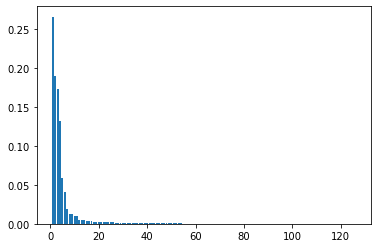

In [500]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

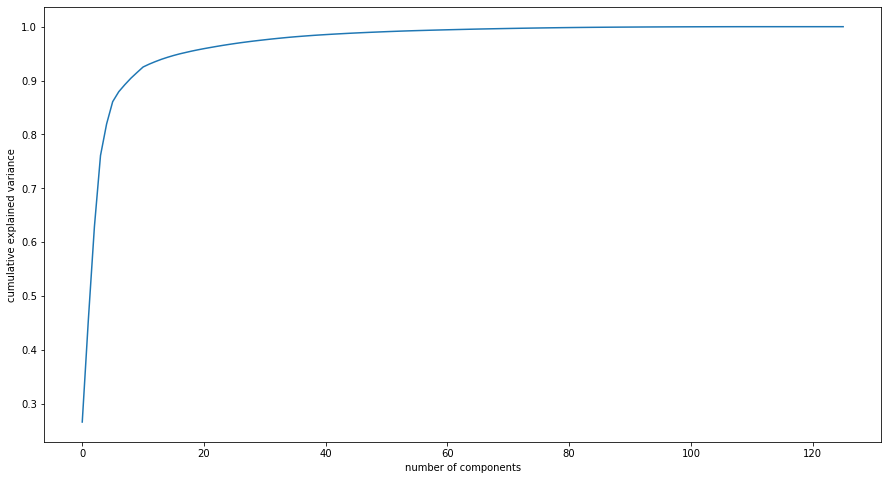

In [501]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we can see around 20 component explain 90% of variance in the data

In [502]:

pca_final = IncrementalPCA(n_components=20)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20967, 20)

#### Correlation matrix

In [503]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

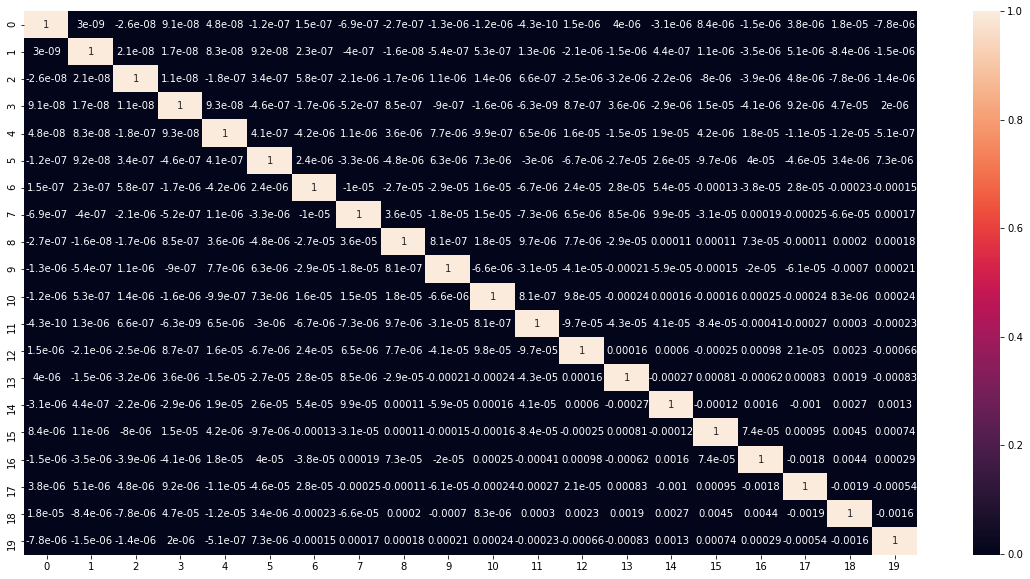

In [504]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [505]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0045409158155691656 , min corr:  -0.0018691520198873197


In [506]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 20)

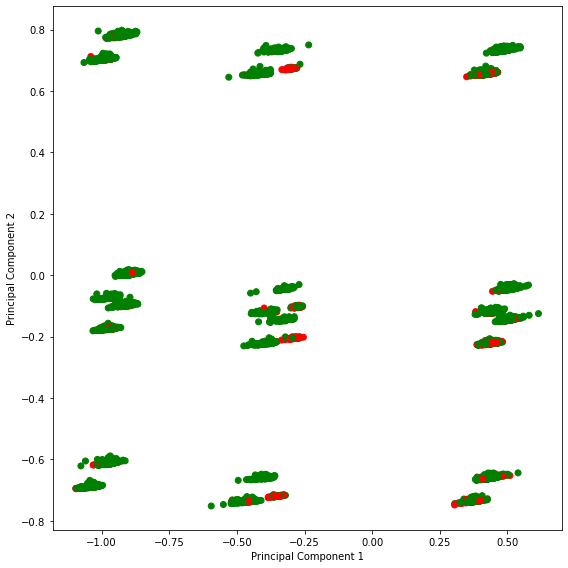

In [507]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### DecisionTreeClassifier With PCA

In [508]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [509]:

# Let's check the evaluation metrics of our default model


# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      8256
           1       0.23      0.74      0.35       730

    accuracy                           0.77      8986
   macro avg       0.60      0.76      0.60      8986
weighted avg       0.91      0.77      0.82      8986

[[6400 1856]
 [ 187  543]]
Acuracy Score 0.7726463387491653


In [510]:

confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))


Acuracy Score 0.7726463387491653
Sensitivity:  0.7438356164383562
Specificity:  0.7751937984496124
false postive rate:  0.2248062015503876
positive predictive value:  0.22634431012922052
Negative predictive value:  0.9716107484439047


In [511]:
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Misclassification Rate:  0.22735366125083464


- As we can see above Sensitivity of model is not great let's tune the Hyperparameter

### Hyperparameter tuning

In [512]:

########## lets tune hyper parameterss
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [513]:
y_train.shape

(20967,)

In [514]:
df_train_pca.shape

(20967, 20)

In [515]:
# scores of GridSearch CV
scores = tree.cv_results_
score_df= pd.DataFrame(scores)
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078105,0.000004,0.000000,0.000000,1,{'max_depth': 1},0.640916,0.631378,0.619127,0.638922,0.635106,0.633090,0.007710,38
1,0.141328,0.001546,0.000000,0.000000,2,{'max_depth': 2},0.640916,0.631378,0.619127,0.638922,0.635106,0.633090,0.007710,38
2,0.193871,0.007535,0.003125,0.006249,3,{'max_depth': 3},0.800191,0.749165,0.793465,0.805867,0.768901,0.783518,0.021308,35
3,0.253065,0.006262,0.003125,0.006249,4,{'max_depth': 4},0.768240,0.749404,0.758407,0.807536,0.762938,0.769305,0.020090,37
4,0.306443,0.007467,0.000000,0.000000,5,{'max_depth': 5},0.778732,0.794945,0.762700,0.802767,0.778917,0.783612,0.013989,34


In [516]:
dt_best = tree.best_estimator_

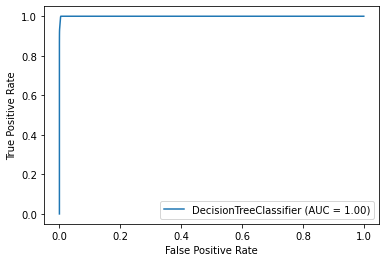

In [517]:
plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

In [518]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [519]:

evaluate_model(dt_best)

Train Accuracy : 0.995898316401965
Train Confusion Matrix:
[[19178    86]
 [    0  1703]]
--------------------------------------------------
Test Accuracy : 0.8787002003115958
Test Confusion Matrix:
[[7670  586]
 [ 504  226]]


In [520]:
CMDT = confusion_matrix(y_train, dt_best.predict(df_train_pca))
# Calculating model validation parameters
metricFORDTwithPCA=[]

TP5 = CMDT[1,1] # true positive 
TN5 = CMDT[0,0] # true negatives
FP5 = CMDT[0,1] # false positives
FN5 = CMDT[1,0] # false negatives


# Let's see the sensitivity of our Decision tree model
print("Sensitivity = ",TP5 / float(TP5+FN5))
metricFORDTwithPCA.append(TP5 / float(TP5+FN5))

# Let us calculate specificity
print("Specificity = ",TN5 / float(TN5+FP5))
metricFORDTwithPCA.append(TN5 / float(TN5+FP5))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP5/ float(TN5+FP5))
metricFORDTwithPCA.append(FP5/ float(TN5+FP5))

# positive predictive value 
print ("Precision = ",TP5 / float(TP5+FP5))
metricFORDTwithPCA.append(TP5 / float(TP5+FP5))

print ("Recall = ", TP5 / float(TP5 + FN5))
metricFORDTwithPCA.append(TP5 / float(TP5 + FN5))
# Negative predictive value
print ("True Negative Prediction Rate = ",TN5 / float(TN5+FN5))
metricFORDTwithPCA.append(TN5 / float(TN5+FN5))

Sensitivity =  1.0
Specificity =  0.9955357142857143
False Positive Rate =  0.004464285714285714
Precision =  0.9519284516489659
Recall =  1.0
True Negative Prediction Rate =  1.0


In [521]:
print(classification_report(y_test, dt_best.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8256
           1       0.28      0.31      0.29       730

    accuracy                           0.88      8986
   macro avg       0.61      0.62      0.61      8986
weighted avg       0.88      0.88      0.88      8986



In [522]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,  dt_best.predict(df_test_pca), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.31
Specificity: 	0.93


In [523]:
resultTable = {'Metric':["Sensitivity ", "Specificity", "False Positive Rate", "Precision ", "Recall ", "True NegativeRate"],
              'Logistic regression':metricLR}
#rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Logistic regression'])
#ls_metric = pd.Series(metricLRWithPCA, name ='Logistic regressionWithPCA')
DT_metric = pd.Series(metricFORDTwithPCA, name ='DTWithPCA')
final = pd.concat([final,DT_metric],axis=1)
final

,Metric,Logistic regression,Logistic regressionWithPCA,DTWithPCA
0,Sensitivity,0.789041,0.736986,1.000000
1,Specificity,0.829215,0.750363,0.995536
2,False Positive Rate,0.170785,0.249637,0.004464
3,Precision,0.290030,0.207003,0.951928
4,Recall,0.789041,0.736986,1.000000
5,True NegativeRate,0.978000,0.969939,1.000000


- After tuining the Hyperparameter also it has poor sensitivity rate

## Random Forest

In [524]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [525]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [526]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9273822650157488
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


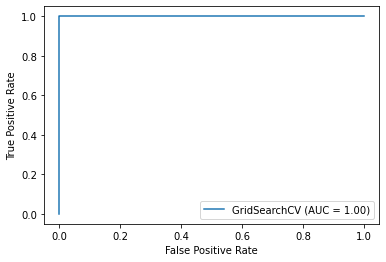

In [527]:

plot_roc_curve(model, X_train, y_train)
plt.show()

In [528]:

# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

metricRF=[]
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
metricRF.append(round(sensitivity, 2))
metricRF.append(round(specificity, 2))
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))




# Calculating model validation parameters
metricLRWithPCA=[]

TP5 = cm[1,1] # true positive 
TN5 = cm[0,0] # true negatives
FP5 = cm[0,1] # false positives
FN5 = cm[1,0] # false negatives


precision = precision_score(y_test, y_pred)
print("precision:    \t", round(precision),2)
recall = recall_score(y_test, y_pred)
print("recall:    \t", round(recall),2)
metricRF.append(round(precision, 2))
metricRF.append(round(recall, 2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN5 / float(TN5+FN5))
metricRF.append(TN5 / float(TN5+FN5))

[[8138  118]
 [ 382  348]]
Sensitivity: 	0.48
Specificity: 	0.99
AUC:    	 0.92
precision:    	 1 2
recall:    	 0 2
True Negative Prediction Rate =  0.9551643192488263


- <b>Poor sensitivity. .</b>

<b>- Choosing best features</b>

In [529]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

11


In [530]:

# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.8s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [531]:
# OOB score
rf_model.oob_score_

0.9413363857490342

In [532]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8167   89]
 [ 404  326]]
Sensitivity: 	0.45
Specificity: 	0.99
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


Feature Importance

In [533]:
# predictors
features = X.columns
# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})

feature_importance = feature_importance[['variables', 'importance_percentage']]


# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,arpu_8,6.232976
1,last_day_rch_amt_8,5.848855
2,loc_ic_t2m_mou_8,3.777753
3,loc_ic_mou_8,3.686753
4,total_og_mou_8,3.310423
...,...,...
121,og_others_7,0.019418
122,og_others_8,0.009524
123,total_rech_data_group_8_10-25_Recharges,0.005948
124,tenure_range_5 Yrs and above,0.005600


### Extracting top 30 features

In [534]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

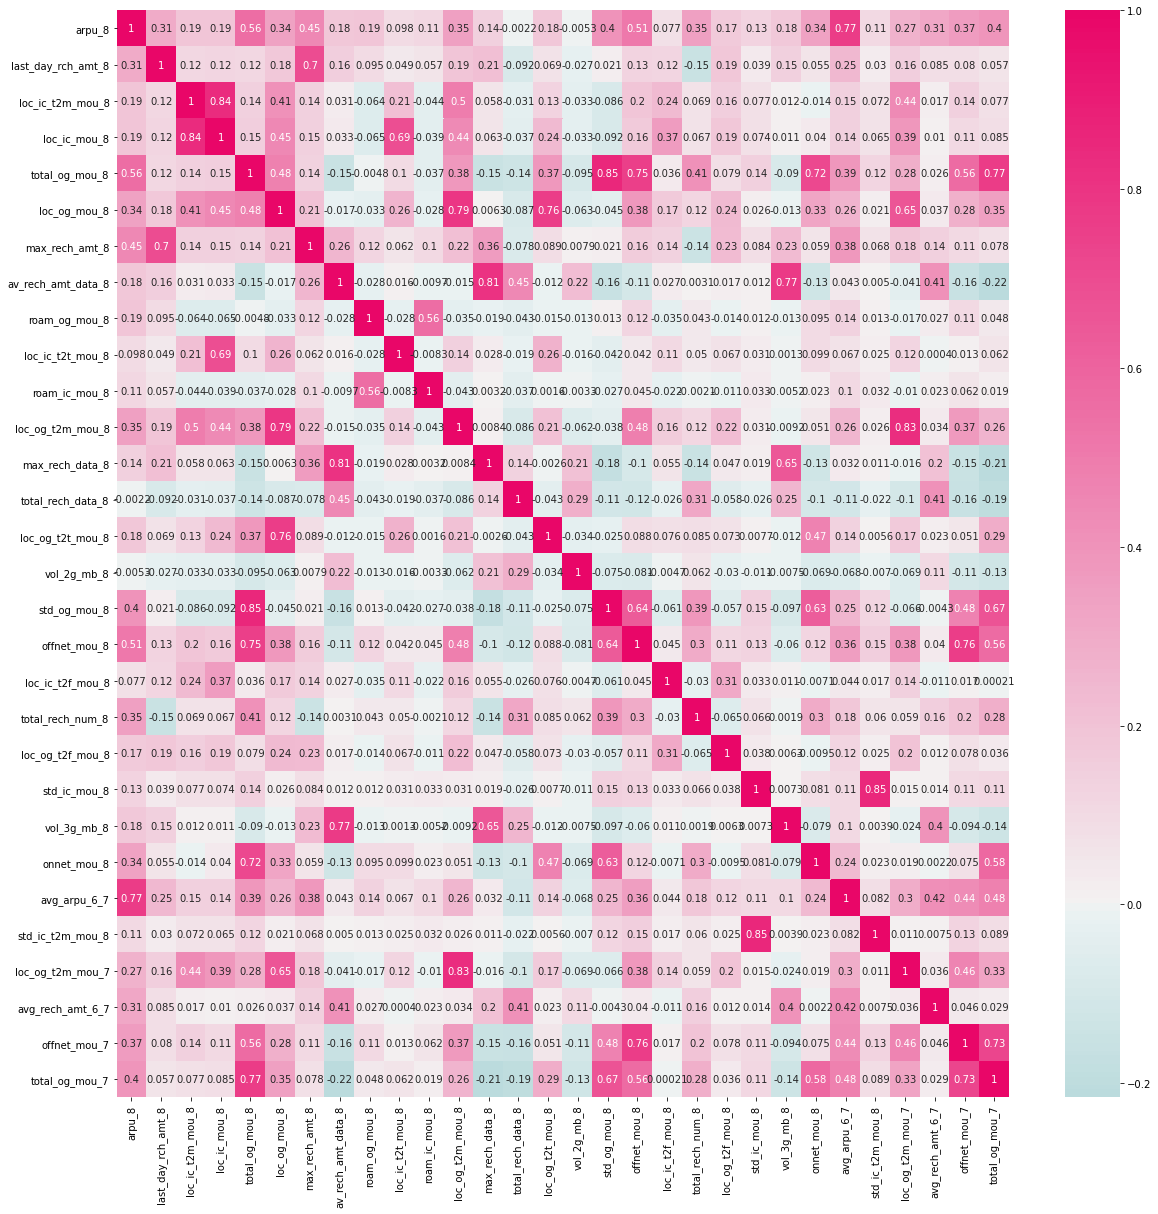

In [535]:

# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(20,20)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap, annot=True)


In [536]:
top_features = ['total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [537]:

# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [538]:

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [539]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8667217436890517
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [540]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm_RF = confusion_matrix(y_test, y_pred)
print(cm_RF)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6577 1679]
 [ 178  552]]
Sensitivity: 	0.76
Specificity: 	0.8
ROC:    	 0.85


In [541]:
# Calculating model validation parameters
metricRFPCA=[]
TP6 = cm_RF[1,1] # true positive 
TN6 = cm_RF[0,0] # true negatives
FP6 = cm_RF[0,1] # false positives
FN6 = cm_RF[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",sensitivity)
metricRFPCA.append(sensitivity)

# Let us calculate specificity
print("Specificity = ",specificity)
metricRFPCA.append(specificity)

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP6/ float(TN6+FP6))
metricRFPCA.append(FP6/ float(TN6+FP6))

# positive predictive value 
print ("Precision = ",TP6 / float(TP6+FP6))
metricRFPCA.append(TP6 / float(TP6+FP6))

print ("Recall = ", TP6 / float(TP6 + FN6))
metricRFPCA.append(TP6 / float(TP6 + FN6))
# Negative predictive value
print ("True Negative Prediction Rate = ",TN6 / float(TN6+FN6))
metricRFPCA.append(TN6 / float(TN6+FN6))

Sensitivity =  0.7561643835616438
Specificity =  0.7966327519379846
False Positive Rate =  0.2033672480620155
Precision =  0.24742268041237114
Recall =  0.7561643835616438
True Negative Prediction Rate =  0.9736491487786825


In [542]:
resultTable = {'Metric':["Sensitivity ", "Specificity", "False Positive Rate", "Precision ", "Recall ", "True NegativeRate"],
              'Logistic regression':metricLR}

RF_metric = pd.Series(metricRFPCA, name ='RandomForestWithPCA')
final = pd.concat([final, RF_metric],axis=1)
final


,Metric,Logistic regression,Logistic regressionWithPCA,DTWithPCA,RandomForestWithPCA
0,Sensitivity,0.789041,0.736986,1.000000,0.756164
1,Specificity,0.829215,0.750363,0.995536,0.796633
2,False Positive Rate,0.170785,0.249637,0.004464,0.203367
3,Precision,0.290030,0.207003,0.951928,0.247423
4,Recall,0.789041,0.736986,1.000000,0.756164
5,True NegativeRate,0.978000,0.969939,1.000000,0.973649


Extract the intercept and the coefficients from the logistic model

In [543]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [544]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [545]:
# coefficients
coefficients = logistic_model.coef_.reshape((7, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [546]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.455392,-3.611538,-0.165074,0.034131,0.212094,-0.231057,-1.356459,2.689748


#### Best Models
- Logistic Regression and Random Forest With PCA has highest sensitivity (True Positive rate)
- So we can consider these two are the best models to predict the insights and imp varibles to curn 
---------------------------------------------------------------
#### Business Insights
- Telecom company needs to pay attention on the roaming rates. 
- They need to provide good offers to the customers who are using services from a roaming zone.
- The company needs to focus on the STD and ISD rates.Need to provide them with some kind of STD and ISD packages.
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and   complaint data and work on their services according to the needs of customers.
---------------------------------------------------------------
#### Main indicator of churn
From above it is clear that the factors affecting the churn are 
- total_og_mou_8 (Total outgoing call: Minutes of usage in the action phase), 
- arpu (Average revenue per user), 
- roam_ic_mou_8 (Roaming incoming call: Minutes of usage in the action phase), 
- roam_og_mou_8 (Roaming outgoing call: Minutes of usage in the action phase),
- std_ic_mou_8(STD incoming call: Minutes of usage in the action phase), 
- std_og_mou_8 (STD outgoing call: Minutes of usage in the action phase),
- av_rech_amt_data_8(average recharge amount in the action phase).
---------------------------------------------------------------
#### Steps to help reduce churn

- Provide additional internet services on recharge.
- Speak to customers to fulfil their desires.
- Expansion of 3G network where 3G is currently not available.
- Lower tariffs on data usage,a better 2G area coverage where 3G is not available.
- Give special; discounts or packages(monthly/quarterly/yearly) to customers according to their usage









-----------------------------------THE END---------------------------------------